<a href="https://colab.research.google.com/github/Shubham-Mishra83/bike-sharing-rental-ML-project/blob/main/Bike_Sharing_Rental_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -
Regression analysis on **Bike Sharing Rental Data**


##### **Project Type**    - **Regression**

##### **Team Member -Shubham Mishra


# **Project Summary -**

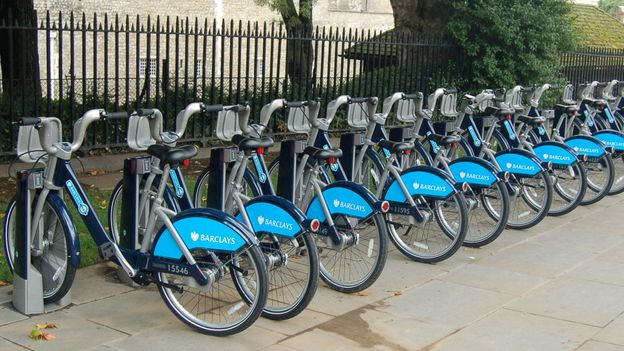


Engaging in bicycle riding can be a life-changing decision, benefiting your fitness, health, finances, and the environment. Do you recall the days when couples would ride bicycles built for two, exploring car-free or limited-traffic island destinations? Although those days still exist, most bicycle rental businesses are now concentrated in heavily visited tourist areas.

In this case study, the objective is to predict the daily bike rental count based on environmental and seasonal conditions. The dataset consists of 8760 observations, including 13 predictors and 1 target variable. These predictors describe various environmental factors and settings such as season and humidity. The goal is to develop a prediction model that can estimate the demand or count of bikes on a particular day, taking into account the environmental factors.

By building such a model, we can gain insights into the relationship between bike rentals and environmental factors, helping us understand and predict demand patterns.

# **GitHub Link -**

Shubham   -https://github.com/Shubham-Mishra83/Machine-Learning-Regression-model-for-Bike-Sharing-Rental-Agreement.git


# **Problem Statement**


The availability and accessibility of rental bikes have been introduced in numerous urban cities to improve the convenience of mobility. Efficiently predicting the number of bikes needed at different times is crucial for minimizing wait times and ensuring a consistent supply of rental bikes throughout the city. Thus, accurately forecasting the hourly bike count required has become a major concern.

---



# ***Let's Begin !***

## ***1. Know Your Data***

### **Data Description**



The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


**Attribute Information:**

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import loadtxt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as gp
from matplotlib import rcParams
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet

#mporting warnings library. The warnings module handles warnings in Python
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
new_columns=['date','rented_bike_count','hour','temp','humid','wind','visibility','dew_pt_temp','solar_rad','rainfall','snowfall','seasons','holiday','func_day']
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MACHINE_LEARNING/SeoulBikeData.csv',encoding ='unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Dataset Shape
dataset.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

### ***Data Checks to perform***
Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull

<bound method DataFrame.isnull of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°

In [ ]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

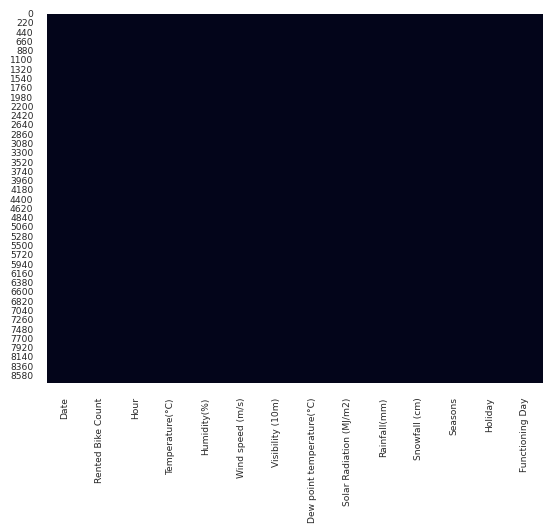

In [ ]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(),cbar=False)

### What did you know about your dataset?

Here we can visualize easily that there is no null valve in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Title Default title text
# Dataset Describe
dataset.describe

<bound method NDFrame.describe of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°

### Check Unique Values for each variable.

In [ ]:
dataset.columns.unique()

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Check Unique Values for each variable.
dataset.nunique(axis=0,dropna=True)

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

In [ ]:
# Dataset look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#defining categorical columns
print("Categories in 'Seasons' variable:     ",end=" " )
print(dataset['Seasons'].unique())

print("Categories in 'Holiday' variable:  ",end=" ")
print(dataset['Holiday'].unique())

print("Categories in'Functioning Day' variable:",end=" " )
print(dataset['Functioning Day'].unique())


Categories in 'Seasons' variable:      ['Winter' 'Spring' 'Summer' 'Autumn']
Categories in 'Holiday' variable:   ['No Holiday' 'Holiday']
Categories in'Functioning Day' variable: ['Yes' 'No']


In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

We have 4 categorical features : ['Date', 'Seasons', 'Holiday', 'Functioning Day']


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

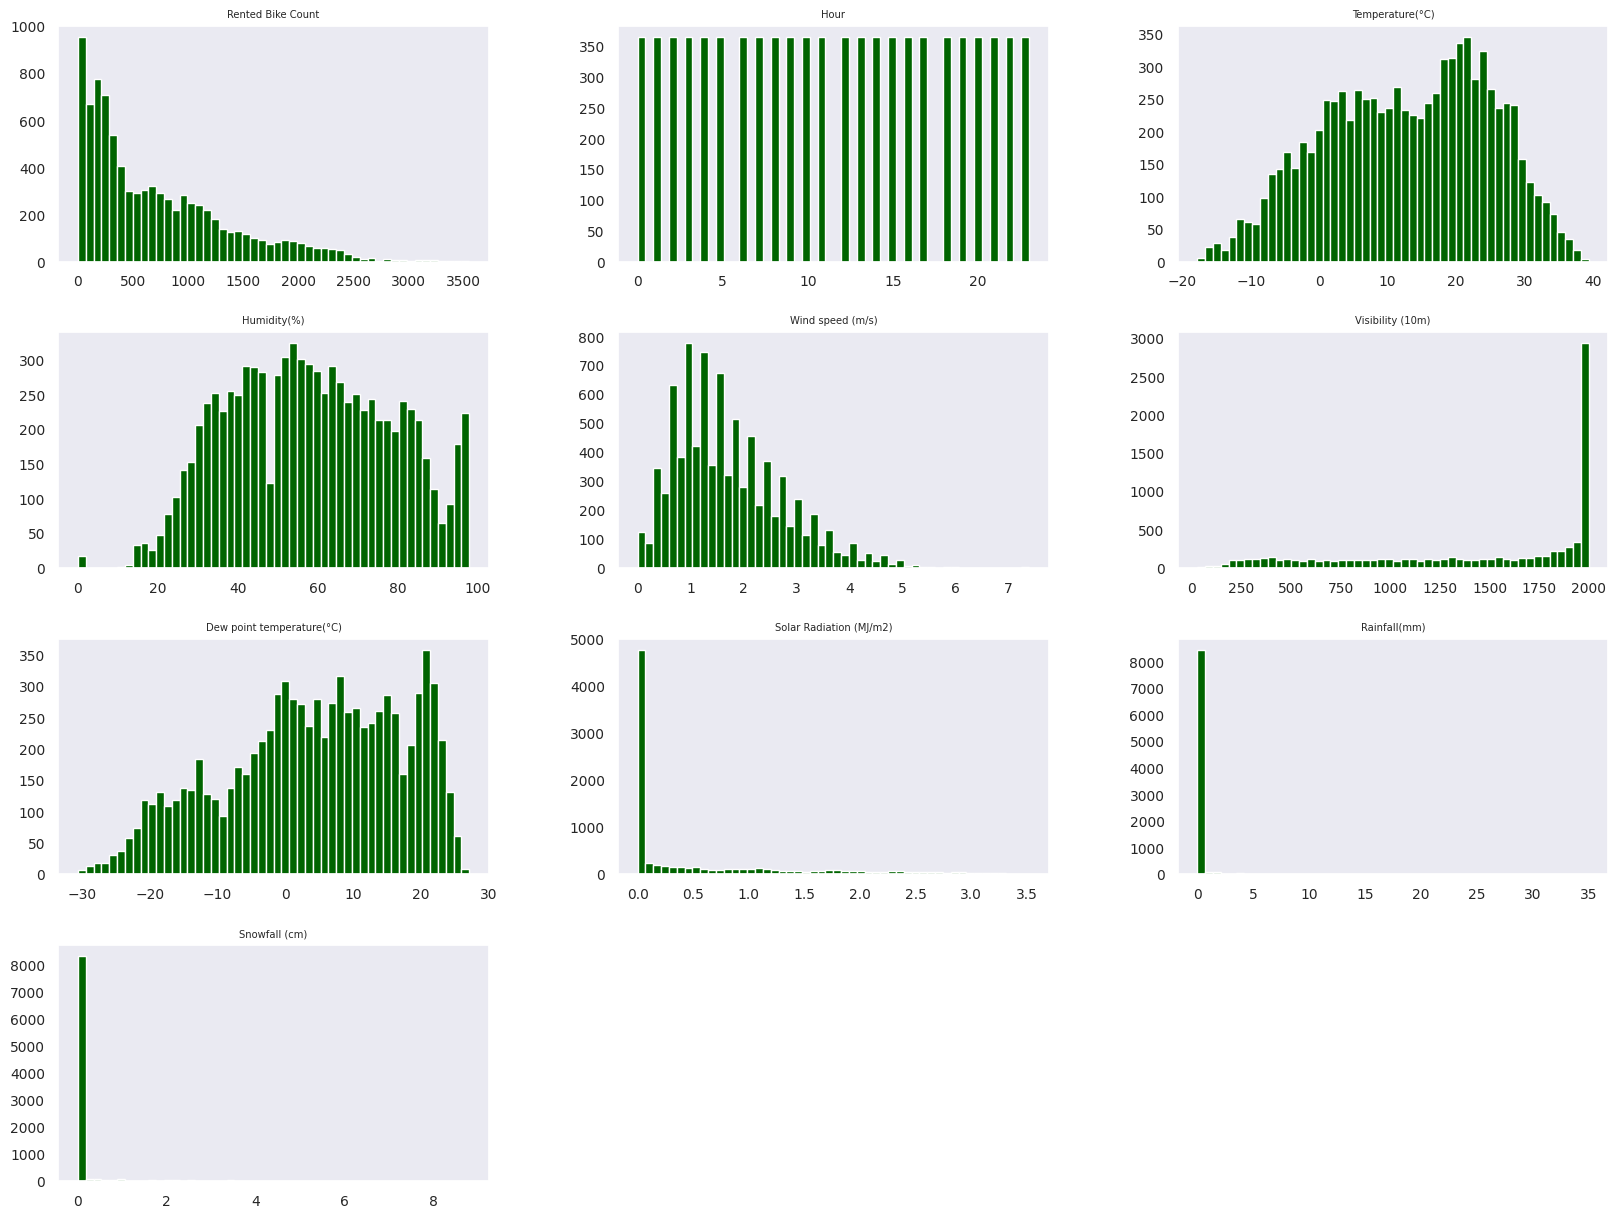

In [ ]:
# Individual variable histogram plot
ax=dataset.hist(bins=50,figsize=(20,15),grid=False,sharey=False,ylabelsize=10,xlabelsize=10,color='darkgreen')

In [ ]:
def column(var):
   return dataset.groupby(var)['Rented Bike Count'].sum().reset_index()

### Rented Bike Count:

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

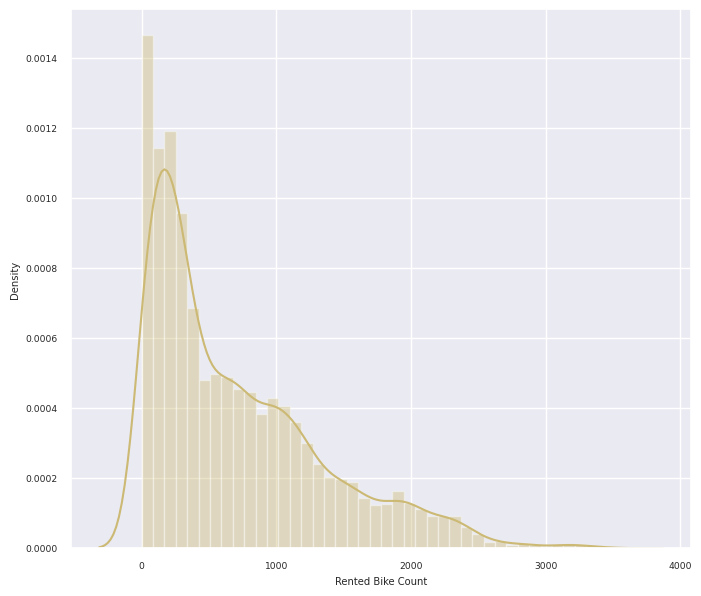

In [ ]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(8,7))
# visualizing rented bike count using sns displot
sns.distplot(dataset['Rented Bike Count'],color="y")


This observation provides insights into the distribution and frequency count of the rented bike count variable.

### HOUR

Text(0, 0.5, 'Count of Rented Bike')

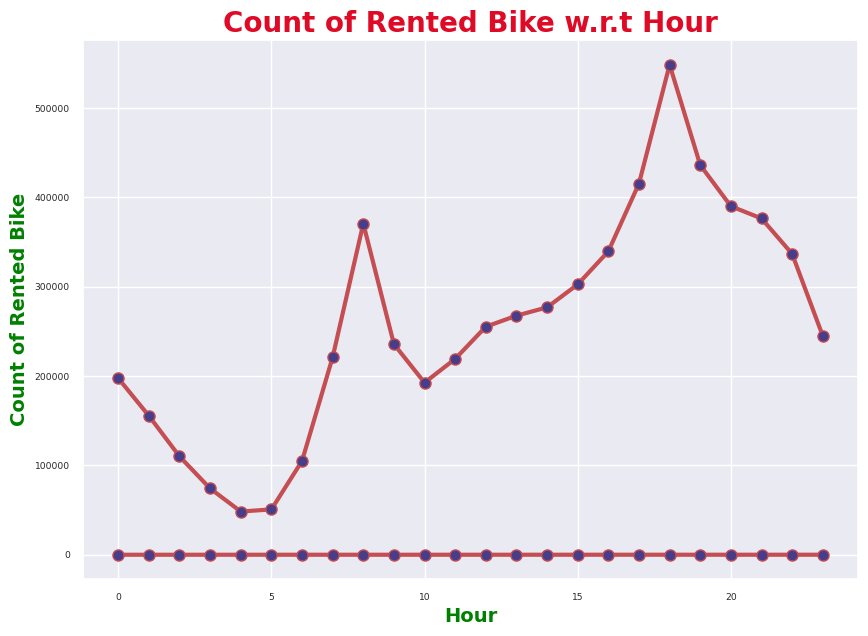

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x=column('Hour')
plt.plot(x,color='r', marker='o',markerfacecolor='darkslateblue', markersize=8,linewidth=3)
ax.set_title('Count of Rented Bike w.r.t Hour',size=20,fontweight='bold',color='#de0a26')
ax.set_xlabel('Hour',size=14,fontweight='bold',color='Green')
ax.set_ylabel('Count of Rented Bike',size=14,fontweight='bold',color='Green')


The data reveals that the peak time for bike rentals is at the 18th hour, which corresponds to 6pm, while the least rental activity occurs at the 4th hour, which is 4am.

### CORRELATION MATRIX

In [ ]:
matrix=dataset.corr()
matrix['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64

 The above correlation shows there is some relationship between Temperature and Hour with respect to Rented Bike Count.

<Axes: >

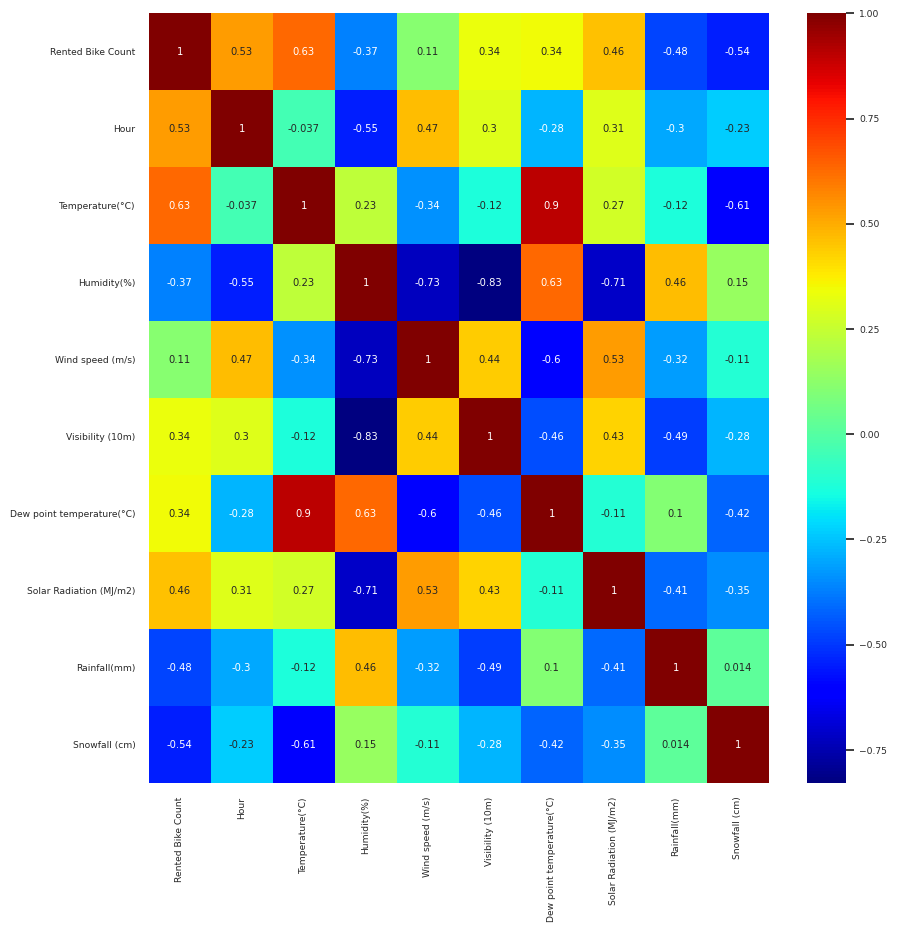

In [ ]:
# Chart - 2 visualization code
plt.subplots(figsize=(10, 10))
sns.heatmap(matrix.corr(),annot=True,cmap="jet")

### TEMPERATURE

In [ ]:
# Chart - 3 visualization code
temp_bike_count=column(dataset['Temperature(°C)'])
temp_bike_count

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


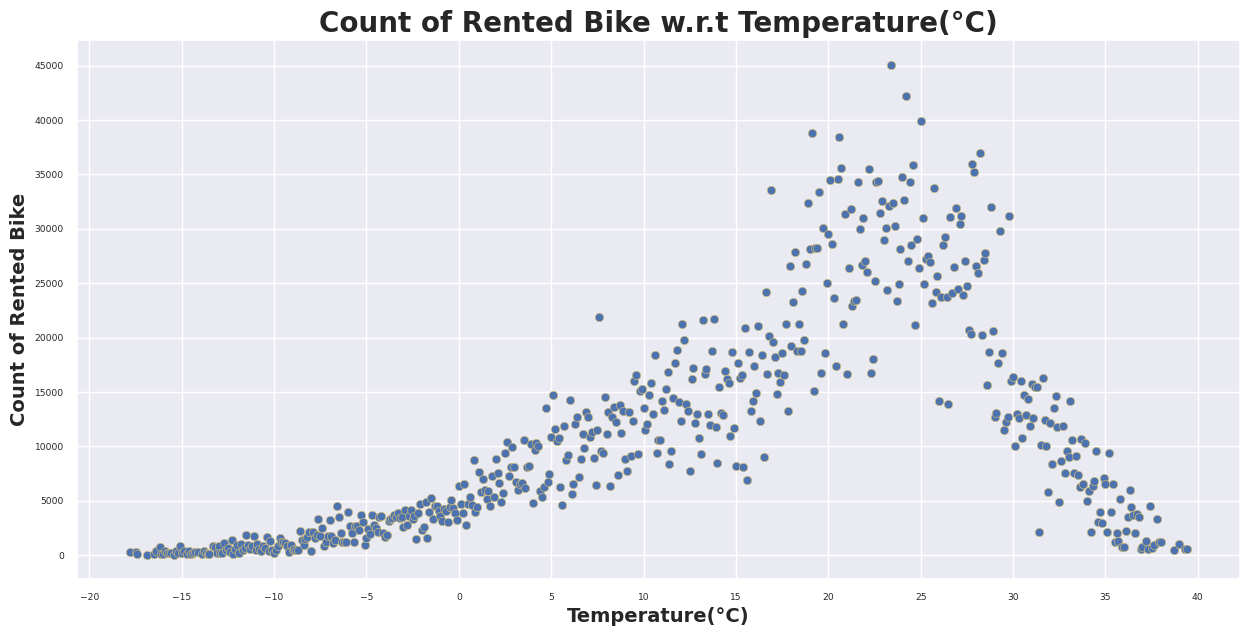

In [ ]:
plt.figure(figsize =(15,7))
ax=plt.axes()
sns.scatterplot(x='Temperature(°C)',y='Rented Bike Count',data=temp_bike_count,edgecolor='y')
ax.set_title('Count of Rented Bike w.r.t Temperature(°C)',size=20,fontweight='bold')
ax.set_xlabel('Temperature(°C)',size=14,fontweight='bold')
ax.set_ylabel('Count of Rented Bike',size=14,fontweight='bold')
ax.set_xticks(range(-20,41,5))
ax.set_yticks(range(0,45001,5000))
sns.set(font_scale=1)
plt.show()

In order to check the values of bike rent count with respect to Temperature(°C) we have chosen scatter plot.
The data shows that the highest number of bike rentals occur when the temperature ranges from 15 to 30 degrees.

### MONTHLY SALES:

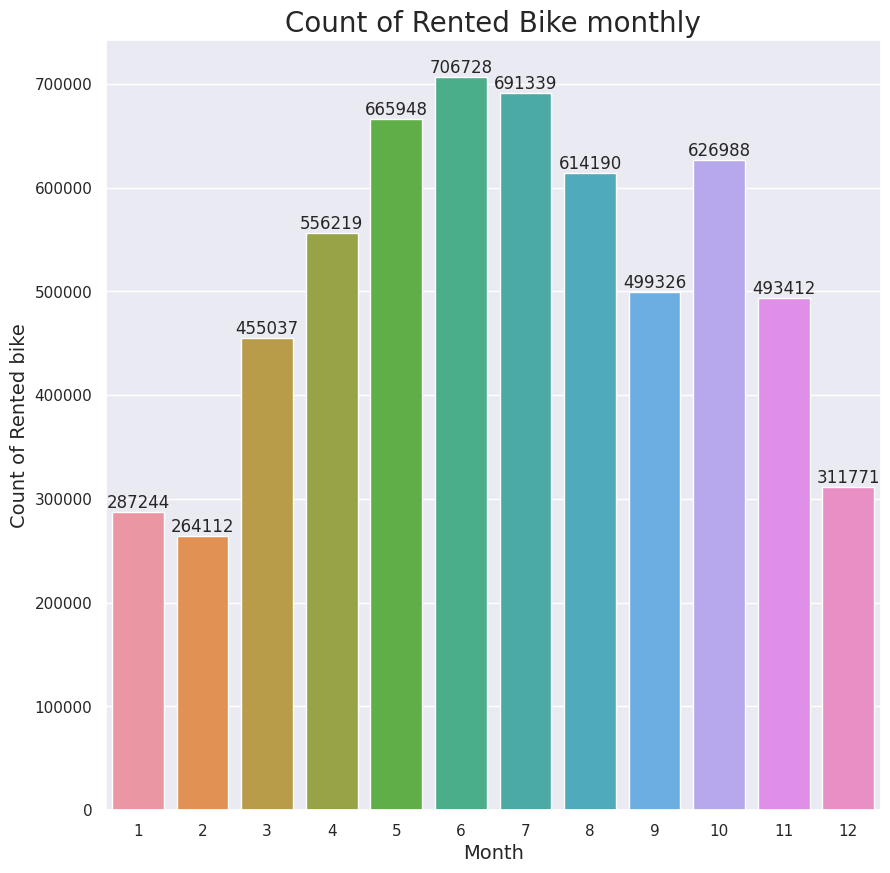

In [ ]:
dataset['month']=pd.DatetimeIndex(dataset['Date']).month
monthly_rent=column(dataset['month'])
monthly_rent.set_index('month')
# PLOT FOR MONTHLY SALES
plt.figure(figsize =(10,10))
ax=plt.axes()
p=sns.barplot(data=monthly_rent,x="month", y="Rented Bike Count")
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Count of Rented Bike monthly',size=20)
ax.set_xlabel('Month',size=14)
ax.set_ylabel('Count of Rented bike',size=14)
plt.show()

### SEASONS

In [ ]:
# Chart - 4 visualization code
seasons_bike_count=column('Seasons')
seasons_bike_count

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


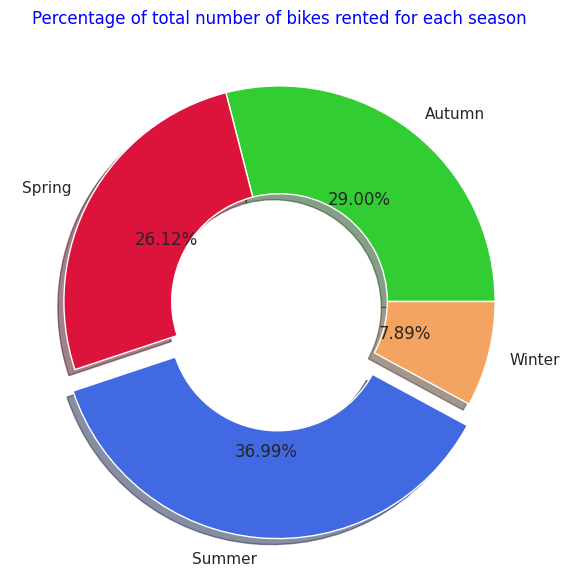

In [ ]:
plt.figure(figsize =(7,7))
ax=plt.axes()
colors=['limegreen','crimson','royalblue','sandybrown']
explode=[0,0,0.1,0]
ax.pie(seasons_bike_count['Rented Bike Count'],labels=seasons_bike_count['Seasons'],autopct='%1.2f%%',shadow=True,explode=explode,wedgeprops=dict(width=0.5),colors=colors)
ax.set_title("Percentage of total number of bikes rented for each season",color='blue')
plt.show()

The data shows that during summer **36.99%** of the total bikes available for rent are rented, which could be attributed to the vacation atmosphere and higher tourist influx. On the other hand, winter has the lowest bike rental with **7.89%** .

### HOLIDAY

In [ ]:
# Holiday
holiday_bike_count=column('Holiday')
holiday_bike_count

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


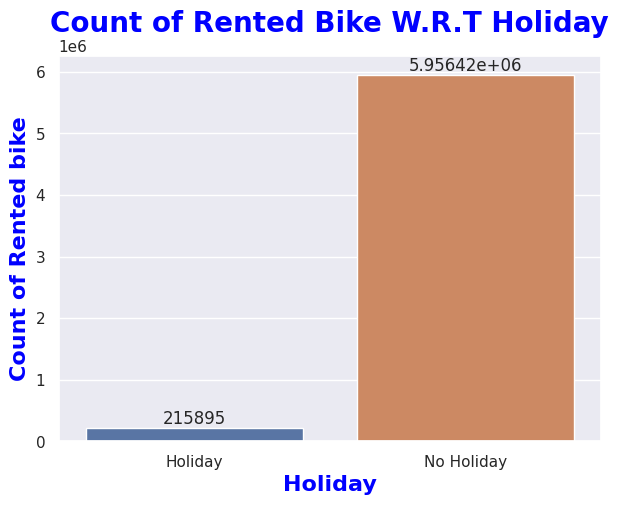

In [ ]:
#Creating a visualisation for the holiday column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.barplot(x="Holiday", y="Rented Bike Count",data=holiday_bike_count, errorbar=None)
ax.set_title('Count of Rented Bike W.R.T Holiday',size=20,fontweight='bold',color='blue')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xlabel('Holiday',size=16,fontweight='bold',color='blue')
ax.set_ylabel('Count of Rented bike',size=16,fontweight='bold',color='blue')
sns.set(font_scale=1)
plt.show()


The data indicates that most bike rentals occur on non-holiday days.

###HUMIDITY

In [ ]:
# HUMIDITY
humid_bike_count=column('Humidity(%)')
humid_bike_count

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


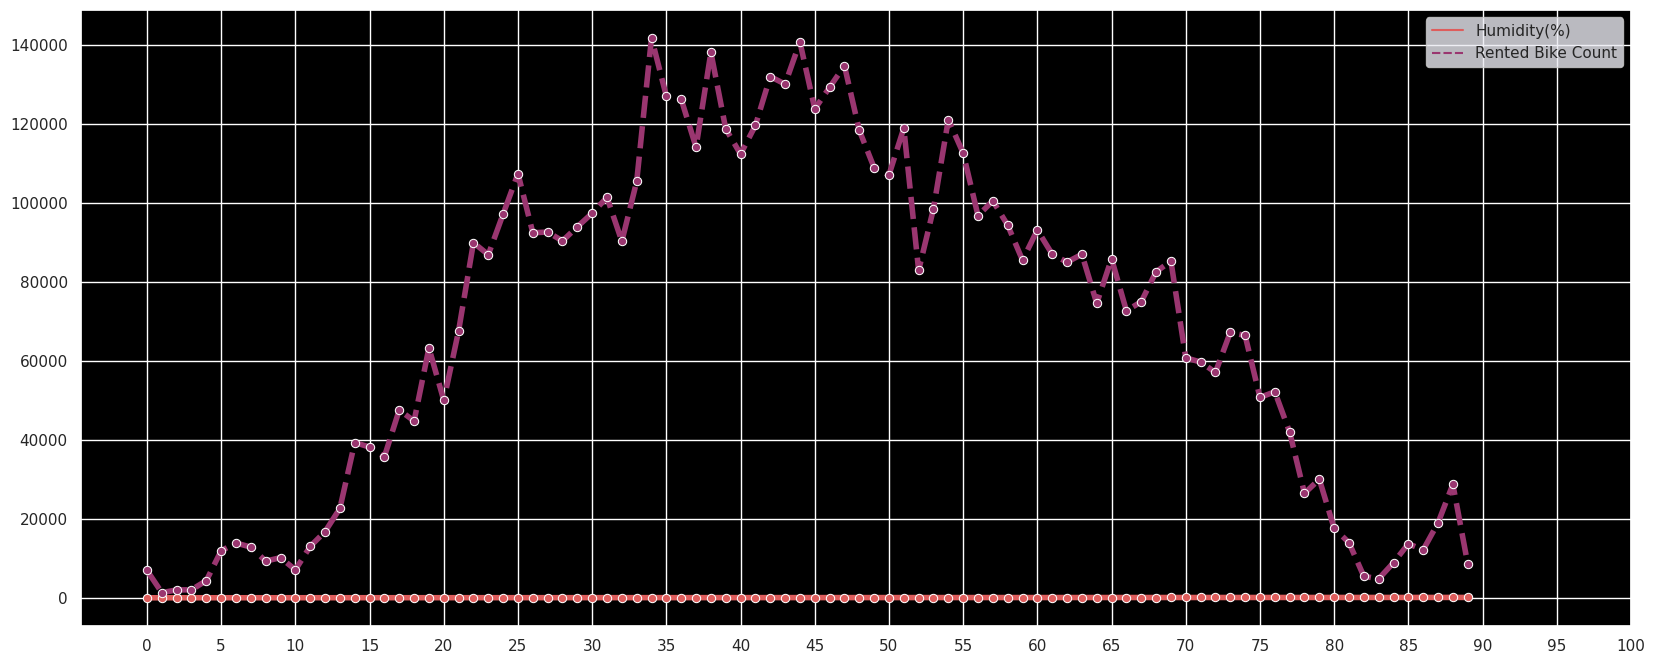

In [ ]:
plt.figure(figsize =(20,8))
ax=plt.axes()
sns.lineplot(data=humid_bike_count, palette="flare",marker='o',linewidth=4)
ax.set_xticks(range(0,101,5))
ax.set_facecolor('Black')

The data indicates that most bike rentals occur when the humidity level falls within the range of 30% to 70%.

### FUNCTIONING DAY



In [ ]:
#Function day column
funcday_bike_count=column(dataset['Functioning Day'])
funcday_bike_count

,Functioning Day,Rented Bike Count
0,No,0
1,Yes,6172314


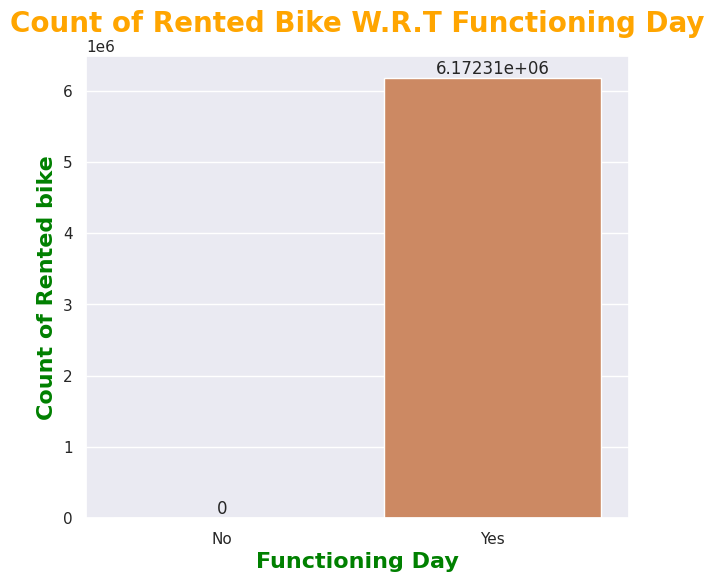

In [ ]:
plt.figure(figsize =(7,6))
ax=plt.axes()
p=sns.barplot(x="Functioning Day", y="Rented Bike Count",data=funcday_bike_count,errorbar=None)
ax.set_title('Count of Rented Bike W.R.T Functioning Day',size=20,fontweight='bold',color='Orange')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xlabel('Functioning Day',size=16,fontweight='bold',color='Green')
ax.set_ylabel('Count of Rented bike',size=16,fontweight='bold',color='Green')
sns.set(font_scale=1)
plt.show()

The data indicates that All bike rentals occur on Function- days.

###DEW POINT TEMPERATURE(°C)

In [ ]:
data=column('Dew point temperature(°C)')
data

,Dew point temperature(°C),Rented Bike Count
0,-30.6,90
1,-30.5,192
2,-29.8,364
3,-29.7,71
4,-29.6,156
...,...,...
551,26.1,2797
552,26.3,468
553,26.6,309
554,26.8,1522


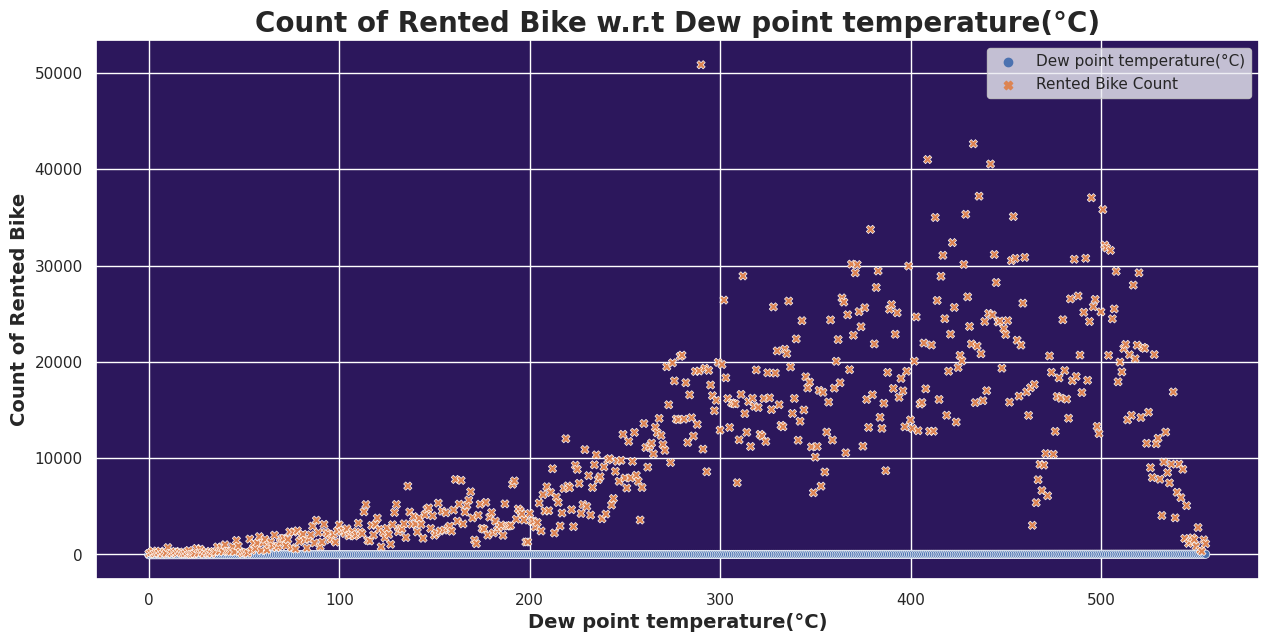

In [ ]:
plt.figure(figsize =(15,7))
ax=plt.axes()
ax.set_facecolor('#2c175c')
sns.scatterplot(data)
ax.set_title('Count of Rented Bike w.r.t Dew point temperature(°C)',size=20,fontweight='bold')
ax.set_xlabel('Dew point temperature(°C)',size=14,fontweight='bold')
ax.set_ylabel('Count of Rented Bike',size=14,fontweight='bold')
sns.set(font_scale=1)
plt.show()


The data shows that the highest number of bike rentals occur when the temperature ranges from 15 to 30 degrees.

###Rainfall(mm

In [ ]:
rain=column('Rainfall(mm)')
rain

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147
...,...,...
56,21.0,19
57,21.5,596
58,24.0,61
59,29.5,122


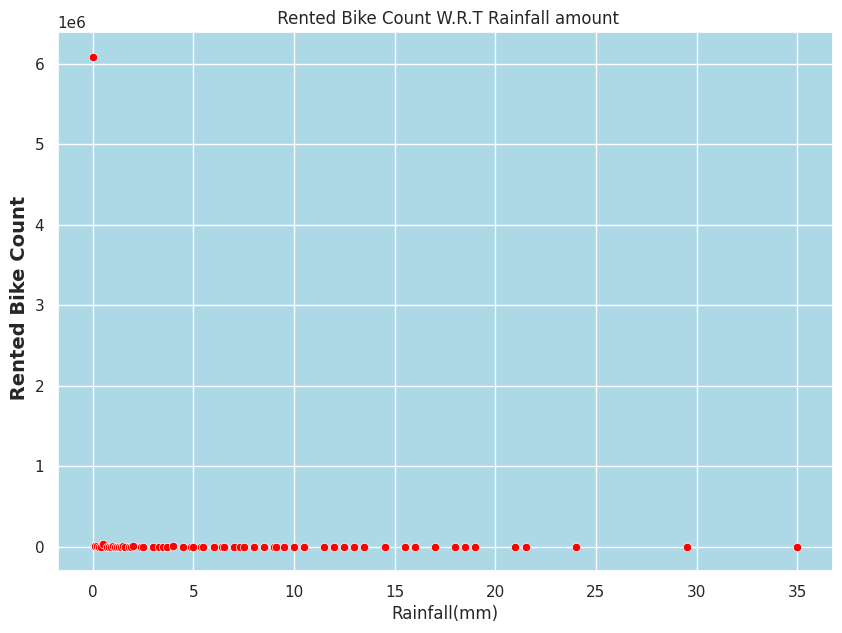

In [ ]:
# RAINFALL

fig, ax = plt.subplots(figsize =(10, 7))
p=sns.scatterplot(x="Rainfall(mm)", y="Rented Bike Count",data=rain,color='red')
plt.title(' Rented Bike Count W.R.T Rainfall amount')
ax.set_ylabel(" Rented Bike Count",size=14,fontweight='bold')
ax.set_facecolor('lightblue')
plt.show()

###Visibility (10m)

In [ ]:
visible=column('Visibility (10m)')
visible

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65
...,...,...
1784,1996,19547
1785,1997,18324
1786,1998,19518
1787,1999,18466


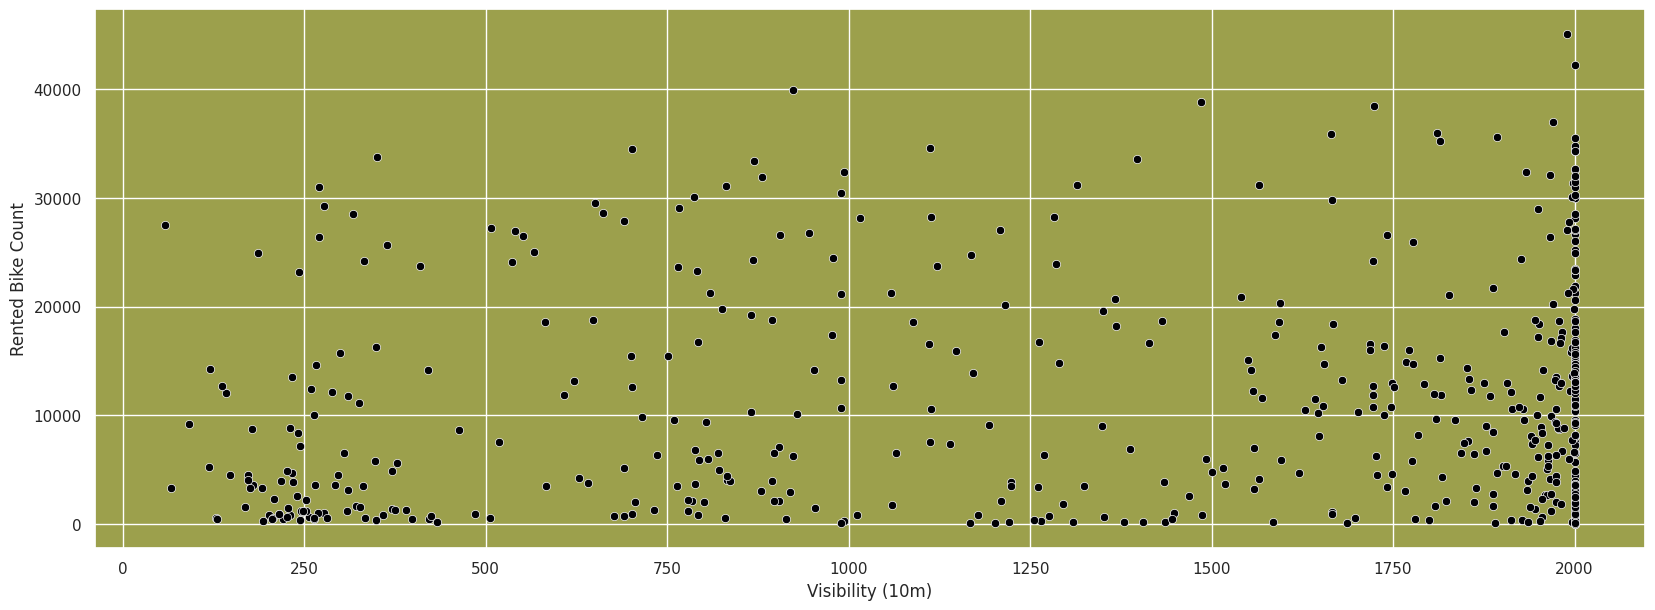

In [ ]:
# Chart - 9 visualization code
visible=column('Visibility (10m)')
plt.figure(figsize =(20,7))
ax=plt.axes()
sns.scatterplot(x=dataset['Visibility (10m)'],y='Rented Bike Count',data=temp_bike_count,color='#010105')
ax.set_facecolor('#9ca04c')

The data suggests that customers prefer higher visibility conditions. Further examination of the visibility_bike dataframe shows that as the visibility increases, there is a corresponding increase in the number of bike rentals.

###Snowfall (cm)

In [ ]:
snow=column('Snowfall (cm)')
snow

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981
5,0.5,4716
6,0.6,2775
7,0.7,5108
8,0.8,5632
9,0.9,4854


Text(0, 0.5, 'Count of Rented Bike')

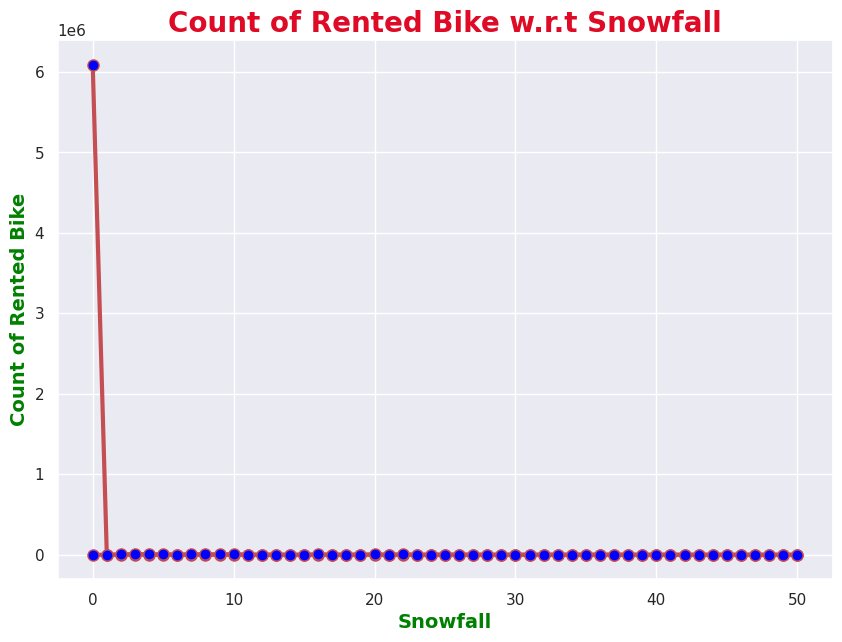

In [ ]:
# Chart - 10 visualization code

fig, ax = plt.subplots(figsize =(10, 7))
plt.plot(snow,color='r', marker='o',markerfacecolor='blue', markersize=8,linewidth=3)
ax.set_title('Count of Rented Bike w.r.t Snowfall',size=20,fontweight='bold',color='#de0a26')
ax.set_xlabel('Snowfall',size=14,fontweight='bold',color='Green')
ax.set_ylabel('Count of Rented Bike',size=14,fontweight='bold',color='Green')


The data reveals that bike rentals are highest when there is no snowfall or rainfall.

### WIND SPEED:

In [ ]:
#wind column
wind_bike_count=column('Wind speed (m/s)')
wind_bike_count

,Wind speed (m/s),Rented Bike Count
0,0.0,33154
1,0.1,28961
2,0.2,42829
3,0.3,71869
4,0.4,87556
...,...,...
60,6.7,146
61,6.9,49
62,7.2,1805
63,7.3,133


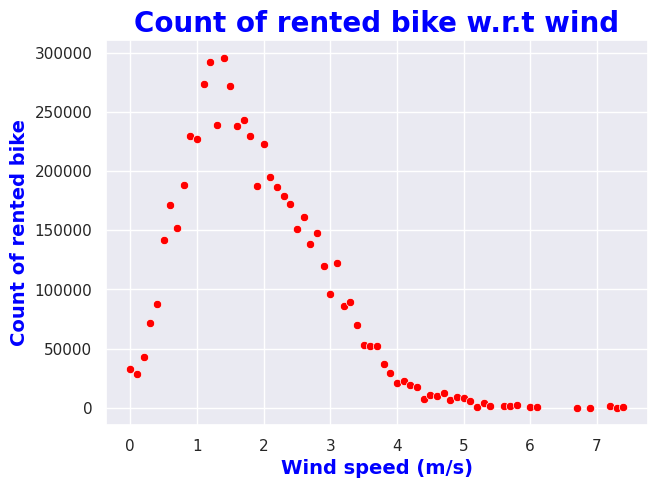

In [ ]:
#Creating a visualisation for the wind column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.scatterplot(x="Wind speed (m/s)", y="Rented Bike Count",data=wind_bike_count,color='red')
ax.set_title('Count of rented bike w.r.t wind',size=20,fontweight='bold',color='blue')
ax.set_xlabel('Wind speed (m/s)',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
plt.show()

The data suggests that the wind speed range of 1 to 3 m/s corresponds to the highest number of bike rentals.

### Solar Radiation(MJ/m2):

In [ ]:
#Solar radiation column
solar_bike_count=column('Solar Radiation (MJ/m2)')
solar_bike_count

,Solar Radiation (MJ/m2),Rented Bike Count
0,0.00,2094379
1,0.01,100481
2,0.02,65643
3,0.03,58231
4,0.04,36019
...,...,...
340,3.42,5089
341,3.44,1216
342,3.45,652
343,3.49,1456


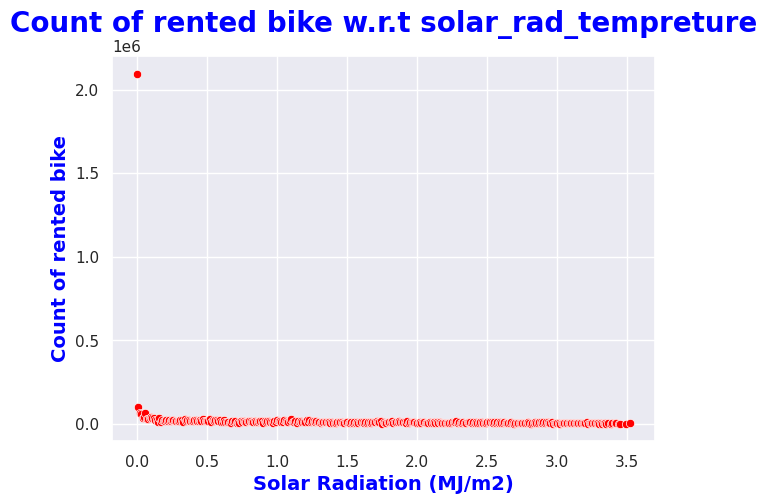

In [ ]:
#Creating a visualisation for the solar radiation column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.scatterplot(x="Solar Radiation (MJ/m2)", y="Rented Bike Count",data=solar_bike_count,color='red')
ax.set_title('Count of rented bike w.r.t solar_rad_tempreture',size=20,fontweight='bold',color='blue')
ax.set_xlabel('Solar Radiation (MJ/m2)',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
plt.show()

The data reveals that bike rentals are highest when there is no solar radiation.

### BOX PLOT

####**Removing outliers:**
Outliers refer to data points that differ significantly from the majority of the data in a dataset. They can distort the data and impact the precision of machine learning models.

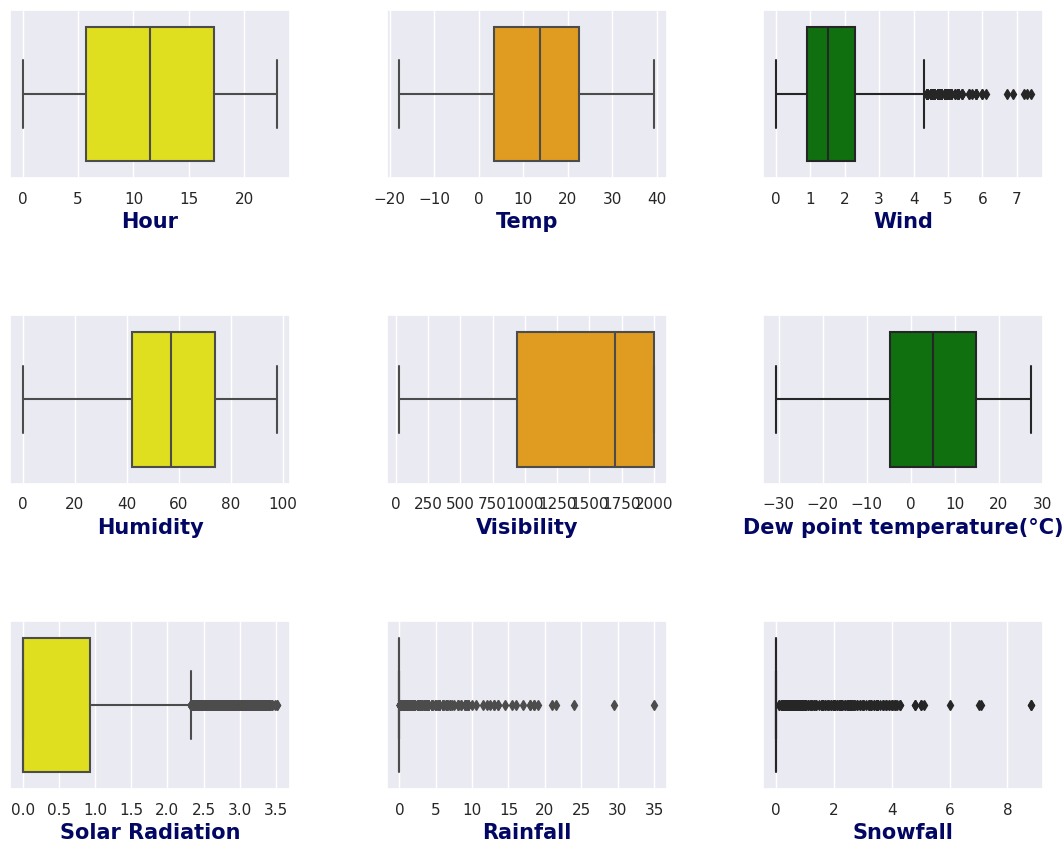

In [ ]:
# Write your code to make your dataset analysis ready.
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(12, 10)
p=sns.boxplot(dataset,x=dataset['Hour'],orient="h",ax=axes[0][0],color='yellow')
p.set_xlabel(xlabel='Hour',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Temperature(°C)'],orient="h",ax=axes[0][1],color='orange')
p.set_xlabel(xlabel='Temp',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Wind speed (m/s)'],orient="h",ax=axes[0][2],color='green')
p.set_xlabel(xlabel='Wind',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Humidity(%)'],orient="h",ax=axes[1][0],color='yellow')
p.set_xlabel(xlabel='Humidity',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Visibility (10m)'],orient="h",ax=axes[1][1],color='orange')
p.set_xlabel(xlabel='Visibility',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Dew point temperature(°C)'],orient="h",ax=axes[1][2],color='green')
p.set_xlabel(xlabel='Dew point temperature(°C)',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Solar Radiation (MJ/m2)'],orient="h",ax=axes[2][0],color='yellow')
p.set_xlabel(xlabel='Solar Radiation',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Rainfall(mm)'],orient="h",ax=axes[2][1],color='orange')
p.set_xlabel(xlabel='Rainfall',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Snowfall (cm)'],orient="h",ax=axes[2][2],color='green')
p.set_xlabel(xlabel='Snowfall',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})
fig.tight_layout(pad=5.0)
sns.set(font_scale=.6)


**OUTLIERS**

In [ ]:
outliers=['Snowfall (cm)','Solar Radiation (MJ/m2)','Rainfall(mm)','Wind speed (m/s)']
# As the above variables are seen to have outlier values which can be easily observed from BOX PLOT
outliers

['Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Wind speed (m/s)']

### INTERQUARTILE RANGE:


**INTERQUARTILE RANGE**
>

Interquartile range tells you the spread of the middle half of your distribution.

Quartiles segment any distribution that’s ordered from low to high into four equal parts. The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set.

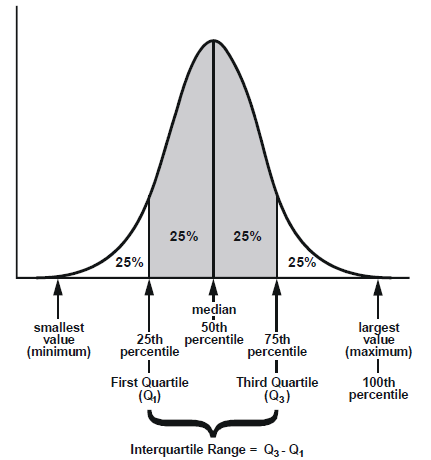

In [ ]:
# First Quartile data(Q1) is the value below which 25 percent of the distribution lies
Q1= np.percentile(dataset[outliers],25,axis=0)
Q1


array([0. , 0. , 0. , 0.9])

In [ ]:
# Third Quartile (Q3) is the value below which 25 percent of the distribution lies
Q3= np.percentile(dataset[outliers],75,axis=0)
Q3

array([0.  , 0.93, 0.  , 2.3 ])

In [ ]:
IQR= Q3-Q1
IQR

array([0.  , 0.93, 0.  , 1.4 ])

This code calculates the upper and lower fences for identifying potential outliers in the columns specified in outlier_cols of the dataset DataFrame.

The upper fence (u_fence) is calculated by adding 1.5 times the IQR to the 75th percentile (Q3). Any data point above this value is considered a potential outlier.

The lower fence (l_fence) is calculated by subtracting 1.5 times the IQR from the 25th percentile (Q1). Any data point below this value is considered a potential outlier.

The fences serve as cutoff points for determining which data points in the specified columns are potential outliers. Any data point outside of these fences is considered an outlier and can be examined further to determine if it is an error or a legitimate extreme value.

This applies the boolean mask to the selected columns to remove the outlier values. The resulting dataframe contains only the non-outlier values for the selected columns

In [ ]:
# Calculating Upper and Lower Fence for removing outlier values
upper_fence= Q3+1.5*IQR
lower_fence=Q1-1.5*IQR
print(upper_fence)
print(lower_fence)

[0.    2.325 0.    4.4  ]
[ 0.    -1.395  0.    -1.2  ]


In [ ]:
#Detecting and removing the outliers
dataset[outliers] = dataset[outliers][~((dataset[outliers] < lower_fence) | (dataset[outliers] > upper_fence))]
dataset.info()
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8599 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8119 non-null   float64
 9   Rainfall(mm)               8232 non-null   float64
 10  Snowfall (cm)              8317 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind speed (m/s)             161
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)      641
Rainfall(mm)                 528
Snowfall (cm)                443
Seasons                        0
Holiday                        0
Functioning Day                0
month                          0
dtype: int64

<font size='4px'>
This code calculates the upper and lower fences for identifying potential outliers in the columns specified in outlier_cols of the dataset DataFrame.

<font size='4px'>
The upper fence (u_fence) is calculated by adding 1.5 times the IQR to the 75th percentile (Q3). Any data point above this value is considered a potential outlier.
<font size='4px'>
The lower fence (l_fence) is calculated by subtracting 1.5 times the IQR from the 25th percentile (Q1). Any data point below this value is considered a potential outlier.

<font size='4px'>
The fences serve as cutoff points for determining which data points in the specified columns are potential outliers. Any data point outside of these fences is considered an outlier and can be examined further to determine if it is an error or a legitimate extreme value.

<font size='4px'>
This applies the boolean mask to the selected columns to remove the outlier values. The resulting dataframe contains only the non-outlier values for the selected columns

In [ ]:
for x in outliers:
   dataset[x].fillna(dataset[x].median(),inplace=True)

In [ ]:
dataset.info()
dataset.isna().sum( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
dtype: int64

## FEATURE ENGINEERING:

In [ ]:
# Now we need to encode values for categorical variable Season:
dataset['winter']=np.where(dataset['Seasons']=='Winter',1,0)
dataset['Autumn']=np.where(dataset['Seasons']=='Autumn',1,0)
dataset['Summer']=np.where(dataset['Seasons']=='Summer',1,0)
dataset['Spring']=np.where(dataset['Seasons']=='Spring',1,0)

# Encoding values for Holiday:
dataset['Holiday']=np.where(dataset['Holiday']=='Holiday',1,0)

# For Functioning Day, we need to encode the values:
dataset['Functioning Day']=np.where(dataset['Functioning Day']=='Functioning Day',1,0)

# Dropping Season column as it has been splitted into individual values
dataset.drop(columns=['Seasons'],axis=1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,winter,Autumn,Summer,Spring
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,11,0,1,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,11,0,1,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,11,0,1,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,11,0,1,0,0


## Heat map for null value

In [ ]:
# Chart - HEAT MAP
matrix=dataset.corr()
matrix['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Summer                       0.296549
Solar Radiation (MJ/m2)      0.208722
Visibility (10m)             0.199280
Wind speed (m/s)             0.150898
Autumn                       0.102753
month                        0.070861
Spring                       0.022888
Holiday                     -0.072338
Humidity(%)                 -0.199780
winter                      -0.424925
Rainfall(mm)                      NaN
Snowfall (cm)                     NaN
Functioning Day                   NaN
Name: Rented Bike Count, dtype: float64

<Axes: >

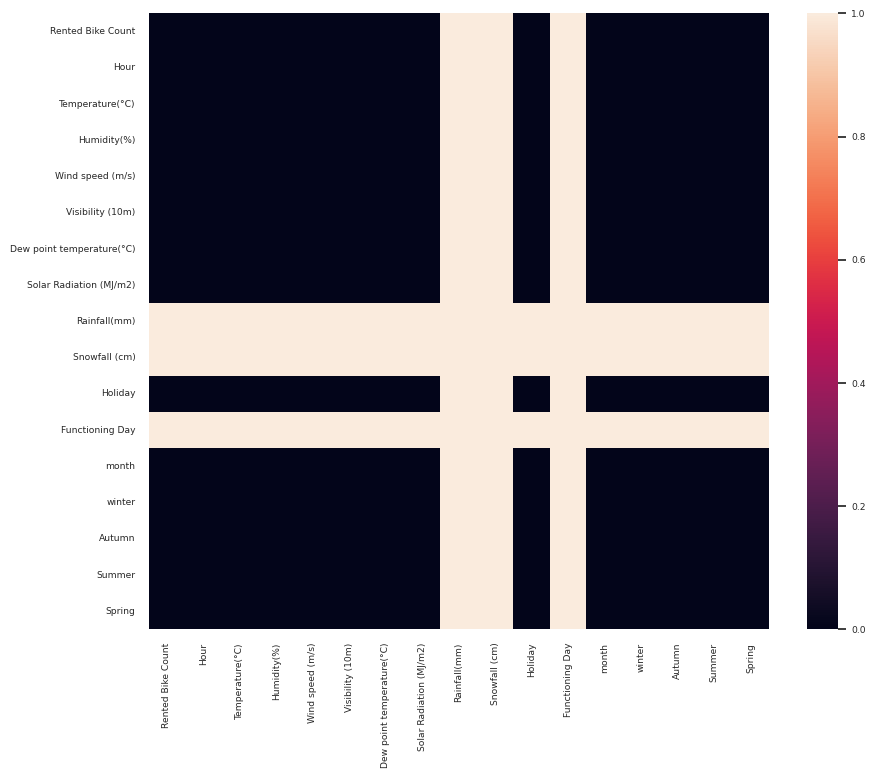

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(matrix.isnull())

In [ ]:
#Removing NAN values
dataset.drop(columns={'Functioning Day','Seasons','Date','month'},axis=1,inplace=True)
dataset

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,winter,Autumn,Summer,Spring
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,0,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,0,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,0,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,0,0


## MULTI COLLINEARITY

> Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable.



In [ ]:
# Independent variable list:
ind_var= list(set(dataset.columns)-{'Rented Bike Count'})
ind_var

['Wind speed (m/s)',
 'Humidity(%)',
 'Rainfall(mm)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Hour',
 'Holiday',
 'Visibility (10m)',
 'Snowfall (cm)',
 'Spring',
 'Temperature(°C)',
 'Autumn',
 'Summer',
 'winter']

In [ ]:
dataset[ind_var]

,Wind speed (m/s),Humidity(%),Rainfall(mm),Dew point temperature(°C),Solar Radiation (MJ/m2),Hour,Holiday,Visibility (10m),Snowfall (cm),Spring,Temperature(°C),Autumn,Summer,winter
0,2.2,37,0.0,-17.6,0.0,0,0,2000,0.0,0,-5.2,0,0,1
1,0.8,38,0.0,-17.6,0.0,1,0,2000,0.0,0,-5.5,0,0,1
2,1.0,39,0.0,-17.7,0.0,2,0,2000,0.0,0,-6.0,0,0,1
3,0.9,40,0.0,-17.6,0.0,3,0,2000,0.0,0,-6.2,0,0,1
4,2.3,36,0.0,-18.6,0.0,4,0,2000,0.0,0,-6.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2.6,34,0.0,-10.3,0.0,19,0,1894,0.0,0,4.2,1,0,0
8756,2.3,37,0.0,-9.9,0.0,20,0,2000,0.0,0,3.4,1,0,0
8757,0.3,39,0.0,-9.9,0.0,21,0,1968,0.0,0,2.6,1,0,0
8758,1.0,41,0.0,-9.8,0.0,22,0,1859,0.0,0,2.1,1,0,0


## VARIANCE INFLATION FACTOR
A variance inflation factor is a tool to help identify the degree of multicollinearity.

In general terms,
* VIF between 1 and 5 = variables are moderately correlated
* VIF equal to 1 = variables are not correlated
* VIF greater than 5 = variables are highly correlated





In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# VIF dataframe
def vif(var):
  df = pd.DataFrame()
  df["FEATURE"] = var.columns
  df["VIF"] = [variance_inflation_factor(var.values, i)
                          for i in range(len(var.columns))]
  return df

This is a Python function to calculate the Variance Inflation Factor (VIF) for a set of independent variables. The function takes a pandas DataFrame as input, where each column represents an independent variable, and returns a new DataFrame with two columns: 'Columns' and 'VIF'.

In this function, a new empty DataFrame is created with two columns 'Columns' and 'VIF'. Then, a for loop is run over the range of the number of columns in the input DataFrame, X. For each column, the corresponding name is assigned to the 'Columns' column in the new DataFrame, and the VIF is calculated using the variance_inflation_factor function from the statsmodels library. The result is then assigned to the 'VIF' column in the new DataFrame.

Finally, the function returns the new DataFrame with the 'Features' and 'VIF' columns populated with the corresponding values.





Regenerate response

In [ ]:
vif(dataset[ind_var])


,FEATURE,VIF
0,Wind speed (m/s),1.240989
1,Humidity(%),19.724883
2,Rainfall(mm),NaN
3,Dew point temperature(°C),109.652028
4,Solar Radiation (MJ/m2),1.274182
5,Hour,1.180535
6,Holiday,1.022008
7,Visibility (10m),1.646281
8,Snowfall (cm),NaN
9,Spring,100.114266


There is high value for Dew Point Temperature,Temperature,Autumn,Spring,Summer,Winter. We see there is high correlation between Temperature and Dew Point Temperature. So dropping Dew point Temperature.

In [ ]:
#Removing NAN values
dataset.drop(columns={'Dew point temperature(°C)','Rainfall(mm)','Snowfall (cm)'},inplace=True)

In [ ]:
ind_var=list(set(ind_var)-{'Dew point temperature(°C)','Rainfall(mm)','Snowfall (cm)'})

In [ ]:
vif(dataset[ind_var])

,FEATURE,VIF
0,Wind speed (m/s),1.233527
1,Humidity(%),2.041080
2,Solar Radiation (MJ/m2),1.270823
3,Hour,1.180201
4,Holiday,1.021804
5,Visibility (10m),1.628647
6,Spring,14.439976
7,Temperature(°C),4.420937
8,Autumn,16.181531
9,Summer,21.360075


Since Autumn,Winter,Summer,Spring are seasons and must be having high collinearity ,Thus dropping Winter Feature value because it contains least values of bike rent.

In [ ]:
dataset.drop(columns='winter',inplace=True)

In [ ]:
ind_var=list(set(ind_var)-{'winter'})

In [ ]:
vif(dataset[ind_var])

,FEATURE,VIF
0,Wind speed (m/s),4.707847
1,Temperature(°C),9.481974
2,Solar Radiation (MJ/m2),1.598384
3,Hour,4.025525
4,Holiday,1.070809
5,Visibility (10m),5.216380
6,Spring,3.927898
7,Humidity(%),5.401113
8,Autumn,4.437701
9,Summer,9.167621


This is the step where we observe low value of variance_inflation_factor. Thus issue of Multicollinearity is much resolved.

## ***Drawing correlation between each independent variable with respect to dependent variable.***

<Figure size 400x400 with 0 Axes>

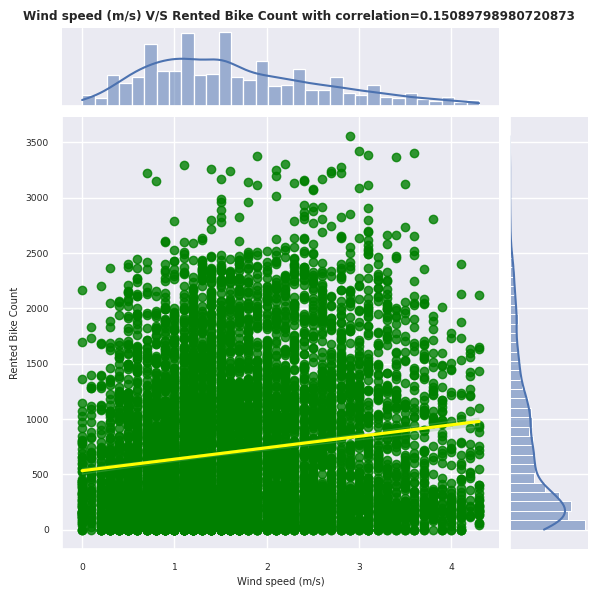

<Figure size 400x400 with 0 Axes>

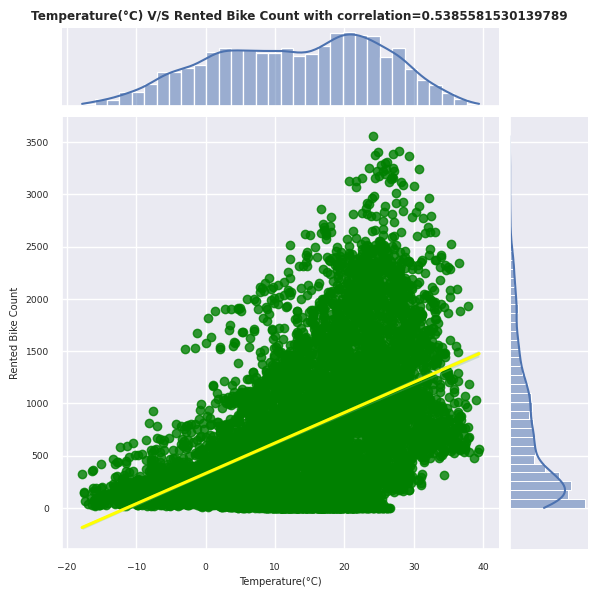

<Figure size 400x400 with 0 Axes>

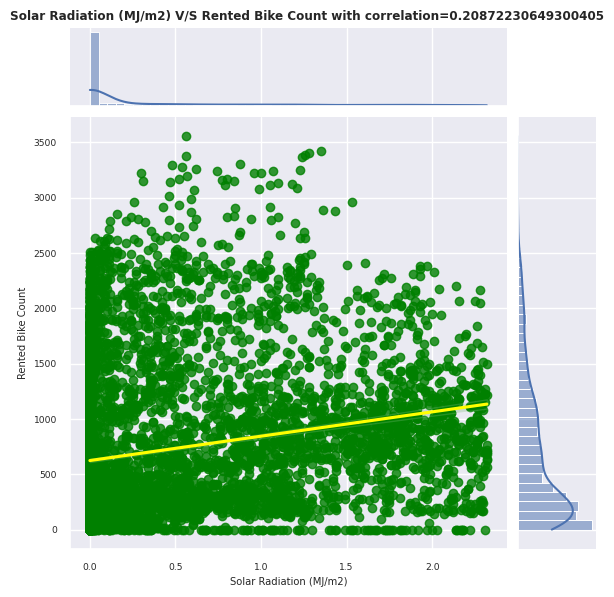

<Figure size 400x400 with 0 Axes>

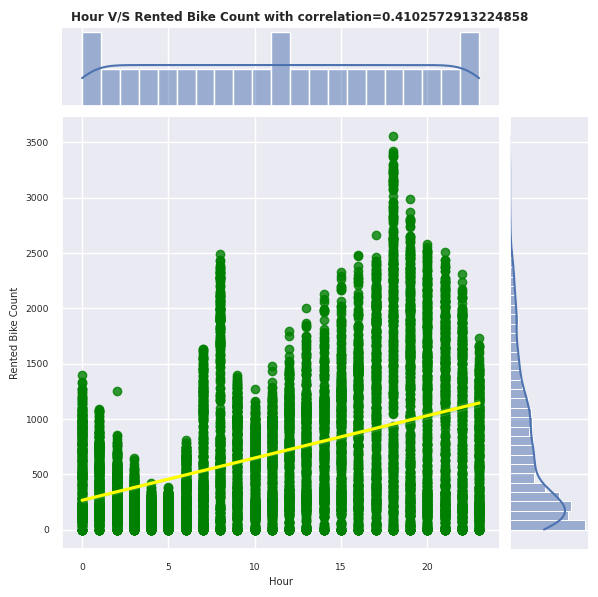

<Figure size 400x400 with 0 Axes>

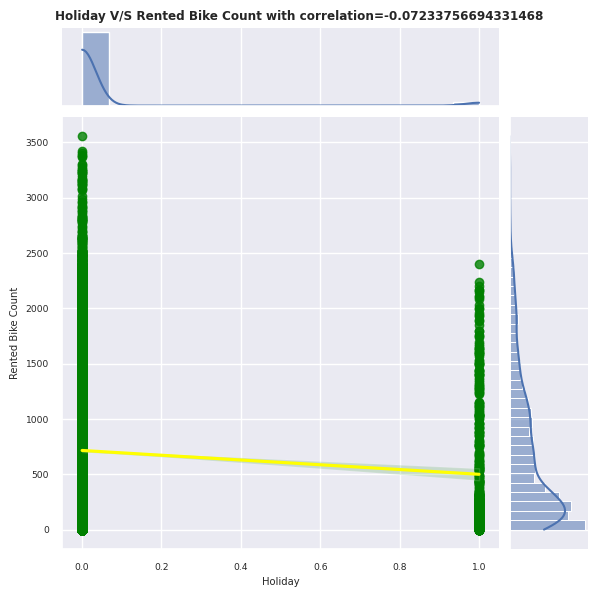

<Figure size 400x400 with 0 Axes>

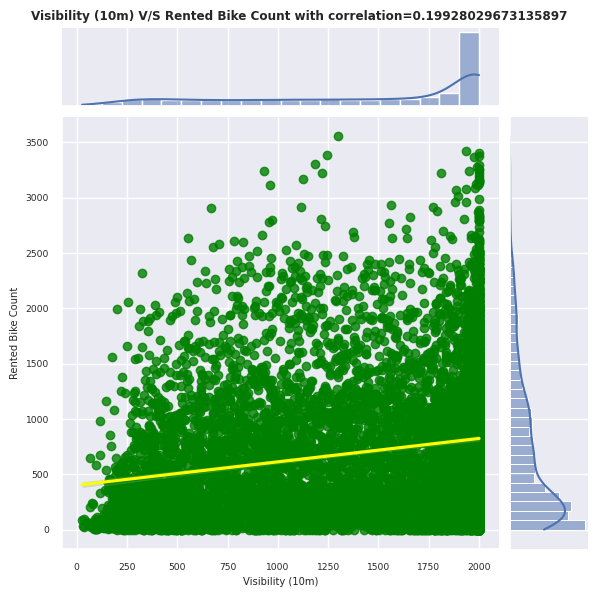

<Figure size 400x400 with 0 Axes>

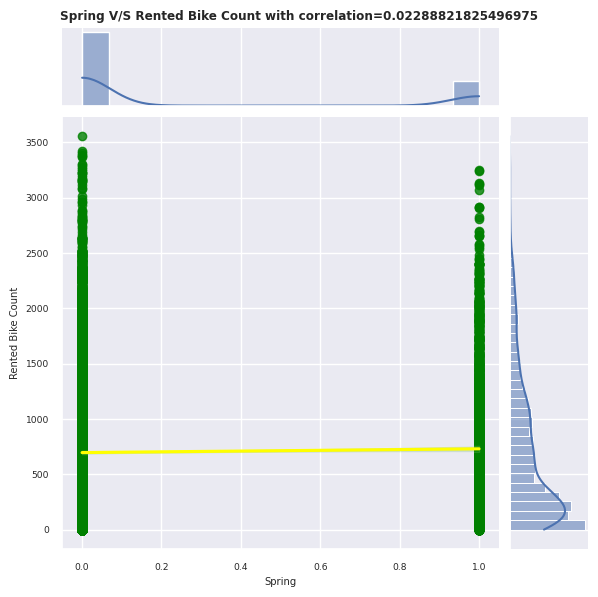

<Figure size 400x400 with 0 Axes>

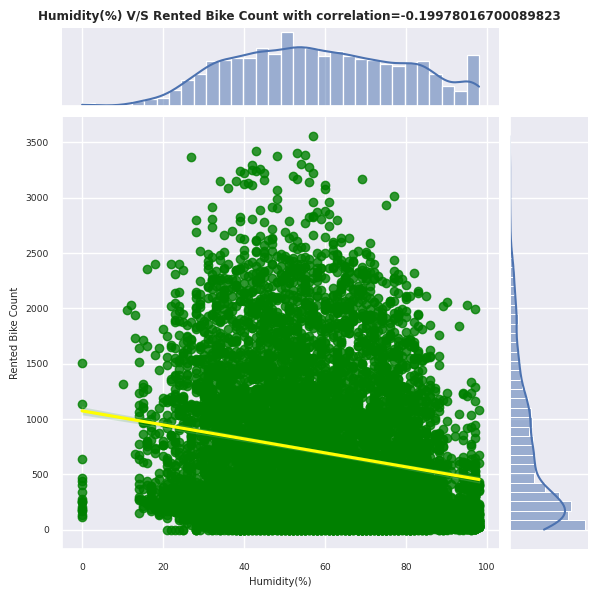

<Figure size 400x400 with 0 Axes>

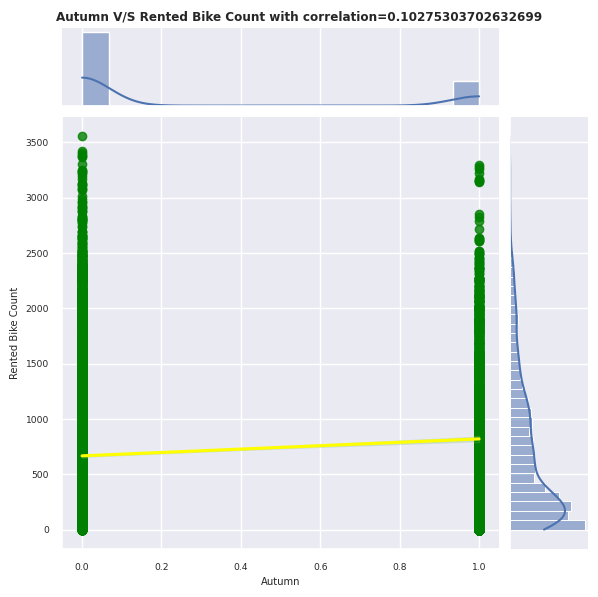

<Figure size 400x400 with 0 Axes>

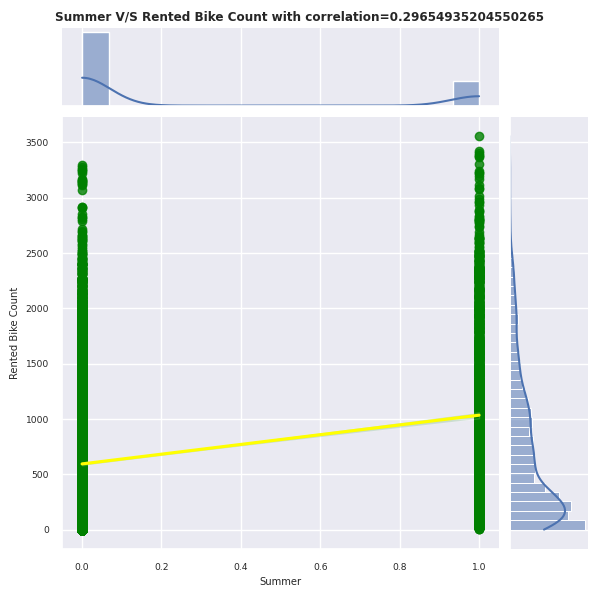

In [ ]:
for i in ind_var:
  plt.figure(figsize=(4, 4))
  corr=dataset[i].corr(dataset['Rented Bike Count'])
  g=sns.jointplot(x=i,y=dataset['Rented Bike Count'],data=dataset,kind='reg',joint_kws={'color':'green'})
  regline = g.ax_joint.get_lines()[0]
  regline.set_color('yellow')
  g.fig.suptitle('{} V/S Rented Bike Count with correlation={}'.format(i,corr),fontweight='bold')
  g.fig.tight_layout()
  g.fig.subplots_adjust(top=0.95)

This statement implies that after checking the scatter plots and regression lines of all the independent variables with the dependent variable, it has been found that all the independent variables have a linear relationship with the dependent variable, which is one of the assumptions of linear regression modeling. Therefore, the data meets the necessary assumptions and can be used to build a linear regression model.






##Creating dataset for depenent and independent variables:

In [ ]:
# Independent variable dataset
X=dataset[ind_var]

In [ ]:
# Independent variable first look
X

,Wind speed (m/s),Temperature(°C),Solar Radiation (MJ/m2),Hour,Holiday,Visibility (10m),Spring,Humidity(%),Autumn,Summer
0,2.2,-5.2,0.0,0,0,2000,0,37,0,0
1,0.8,-5.5,0.0,1,0,2000,0,38,0,0
2,1.0,-6.0,0.0,2,0,2000,0,39,0,0
3,0.9,-6.2,0.0,3,0,2000,0,40,0,0
4,2.3,-6.0,0.0,4,0,2000,0,36,0,0
...,...,...,...,...,...,...,...,...,...,...
8755,2.6,4.2,0.0,19,0,1894,0,34,1,0
8756,2.3,3.4,0.0,20,0,2000,0,37,1,0
8757,0.3,2.6,0.0,21,0,1968,0,39,1,0
8758,1.0,2.1,0.0,22,0,1859,0,41,1,0


In [ ]:
# Dependent variable dataset
Y= dataset['Rented Bike Count']

In [ ]:
# Dependent variable first look
Y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

***Checking distribution of dependent variable***

---




<Axes: xlabel='Rented Bike Count', ylabel='Count'>

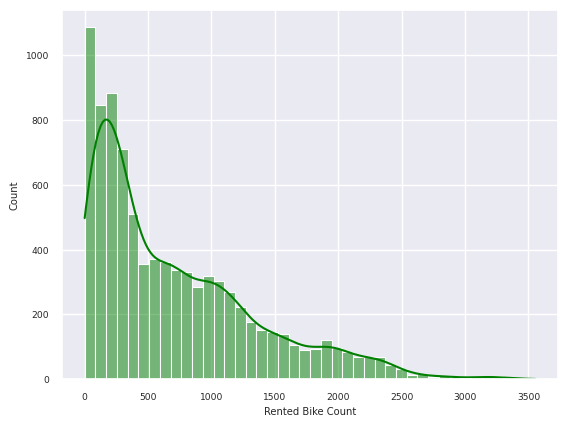

In [ ]:
sns.histplot(Y,color='green',kde=True)

**Skewness** is defined with respect to the distribution of data. In Normal distribution the data is equally spread along the mean, or you can say that it is symmetric along the mean.Skewness is defined with respect to the distribution of data. In Normal distribution the data is equally spread along the mean, or you can say that it is symmetric along the mean.

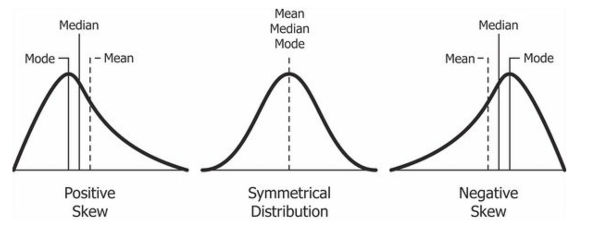

In [ ]:
#Calculating the skewness of the dependent variable
from scipy.stats import kurtosis
from scipy.stats import skew
print("Skewness of Rented Bike Count: ", skew(dataset['Rented Bike Count']))
print(" Kurtosis of Rented Bike Count: ",kurtosis(dataset['Rented Bike Count']))

Skewness of Rented Bike Count:  1.1532306631480034
 Kurtosis of Rented Bike Count:  0.852215121681775


If the dependent variable is positively skewed, applying a square root transformation can help to reduce the skewness and bring the data closer to a normal distribution. This can be beneficial because linear regression models typically assume that the data follows a normal distribution, and violating this assumption can result in biased or inefficient estimates of the model parameters.

By applying a square root transformation to the dependent variable, the resulting values will be the square root of the original values. This can help to spread out the values of the dependent variable and reduce the impact of extreme values on the analysis. However, it's important to note that transforming the dependent variable can also affect the interpretation of the model coefficients and may require back-transformation of the results to the original scale for meaningful interpretation.

### **Transformation**

In [ ]:
Y=np.sqrt(Y)
Y

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented Bike Count, Length: 8760, dtype: float64

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

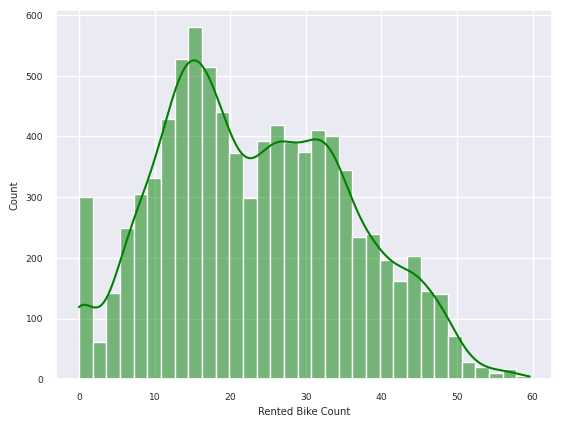

In [ ]:
sns.histplot(Y,color='green',kde=True)

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew
print("Skewness of Rented Bike Count: ", skew(Y))
print("Kurtosis of Rented Bike Count: ",kurtosis(Y))

Skewness of Rented Bike Count:  0.23732144485836718
Kurtosis of Rented Bike Count:  -0.6575109982183132


It can be observed that the target variable has been transformed into a normal distribution, indicating that the normalization process was successful.

## ***TRAIN TEST SPLIT***

In [ ]:
# separate dataset into train and test
#Shape of the train set of the independent values
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
X_train.shape, X_test.shape

((7008, 10), (1752, 10))

In [ ]:
X_train[:10]

,Wind speed (m/s),Temperature(°C),Solar Radiation (MJ/m2),Hour,Holiday,Visibility (10m),Spring,Humidity(%),Autumn,Summer
2031,0.6,8.2,1.22,15,0,291,0,62,0,0
6570,2.4,28.4,0.84,18,0,2000,0,57,0,1
6371,1.7,29.9,0.88,11,0,1992,0,57,0,1
3490,0.6,14.8,2.20,10,0,1749,1,29,0,0
7700,1.1,12.2,0.00,20,0,2000,0,47,1,0
3136,1.5,20.9,1.37,16,0,2000,1,34,0,0
7122,2.7,22.3,0.44,18,1,2000,0,53,1,0
6376,1.9,31.7,0.92,16,0,2000,0,56,0,1
7071,1.4,21.8,1.20,15,0,2000,0,76,1,0
7294,2.2,14.6,0.00,22,0,2000,0,46,1,0


## ***FEATURE SCALING***



> Feature scaling is a crucial step in data preprocessing that aims to standardize the independent features within a dataset to a fixed range. This technique is employed to address situations where the magnitudes, values, or units of the features vary significantly. Without feature scaling, machine learning algorithms may give undue importance to features with larger values and overlook those with smaller values, disregarding the unit of measurement.

>There are two commonly used methods for feature scaling: min-max normalization and standardization. In this project, I will utilize the standardization method, which involves using the StandardScaler() function. This function helps to transform the features so that they have a mean of 0 and a standard deviation of 1. By applying standardization, we can ensure that all features are on a comparable scale, allowing the machine learning algorithm to effectively interpret their relative importance during model training and prediction.


**STANDARD SCALAR**

---



In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_
scaler.transform(X_train)


array([[-1.12853903, -0.38874606,  1.39419319, ...,  0.18996015,
        -0.58042598, -0.57910781],
       [ 0.78580699,  1.29850393,  0.77415027, ..., -0.05608294,
        -0.58042598,  1.72679419],
       [ 0.04133909,  1.42379477,  0.83941794, ..., -0.05608294,
        -0.58042598,  1.72679419],
       ...,
       [ 0.14769165,  1.05627497, -0.59647094, ..., -0.05608294,
        -0.58042598,  1.72679419],
       [ 0.46674932, -0.38039334, -0.59647094, ...,  0.0423343 ,
        -0.58042598, -0.57910781],
       [ 1.74298001, -0.48062601, -0.59647094, ...,  1.22334111,
        -0.58042598, -0.57910781]])

##**6. ML Model Implementation**

>Machine learning models can be defined as programs that undergo training to discover patterns or relationships within data, enabling them to make predictions for new, unseen data.
For the specific project at hand, we are focused on solving a regression problem. As a result, we will employ regression models, which are designed to predict continuous numerical values.

>In this project we will be include the following models:

>   1.Linear regression

>   2.Ridge regression (Linear regression with L2 regularization)

>   3.Lasso regression (Linear regression with L1 regularization)

>   4.ElasticNet regression

>   5.Random forest regression.

####**1.Linear regression:**
>Linear regression is a supervised learning technique within regression analysis. It aims to predict the value of a dependent variable (y) based on the known value of an independent variable (x). By establishing a linear relationship between the input variable (x) and the output variable (y), linear regression seeks to model the underlying pattern in the data.

In [ ]:
# ML Model - 1 Implementation
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# finding the intercept value
regressor.intercept_

16.891429698547817

In [ ]:
# finding regressor coefficient
regressor.coef_

array([ 2.02390609e-02,  3.65902466e-01,  2.66870738e-01,  5.03608590e-01,
       -3.29314521e+00,  3.83697710e-04,  5.64190012e+00, -1.58820742e-01,
        6.28311427e+00,  7.53874081e+00])

In [ ]:
#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_lr = regressor.predict(X_train)
Y_test_pred_lr = regressor.predict(X_test)
print(Y_train_pred_lr)
print('\n', Y_test_pred_lr)

[18.04845455 35.87411348 32.89114495 ... 30.64585285 16.97602857
 22.16596709]

 [17.15910402 20.52146129 16.94881374 ... 13.25429638 29.2329869
 17.10010368]


In [ ]:
#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred, model):
    plt.figure(figsize=(10,6))
    plt.title(f"Comparison of actual values and predictions obtained by {model}",color='blue')
    plt.hist([y_test.values,y_pred], label=['Actual',"Predicted"],stacked=True)
    plt.legend()
    plt.show()

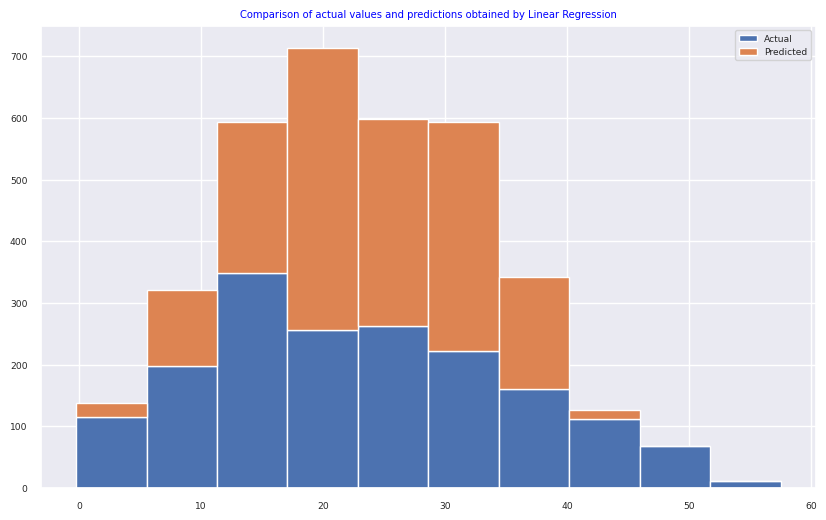

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Linear Regression
plot_comparison(Y_test_pred_lr,'Linear Regression')

In [ ]:
#Creating a function to calculate and display the evaluation metrics for the model
def evaluate_model(y_pred, model):
    evaluate_model = {}
    evaluate_model['Model'] = model
    evaluate_model['MSE'] = mean_squared_error(y_test, y_pred)
    evaluate_model['RMSE'] = np.sqrt(evaluate_model['MSE'])
    evaluate_model['R2'] = r2_score(y_test, y_pred)
    evaluate_model['Adjusted R2'] = 1 - (1 - evaluate_model['R2']) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    print("The evaluation metrics for", evaluate_model['Model'], "are given as:")
    for metric, value in evaluate_model.items():
        print(metric + ":", value)

In [ ]:
#Calculating the evaluation metrics for Linear Regression
evaluate_model(Y_test_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
Model: Linear Regression
MSE: 86.42584134244493
RMSE: 9.296549969878338
R2: 0.4512166147610537
Adjusted R2: 0.44806449882056576


##RIDGE REGRESSION:

Ridge regression is a technique used to estimate regression model coefficients when there is high correlation among the independent variables. It extends the linear regression model by incorporating L2 regularization.

In [ ]:
#Training the ridge regression model using GridSearchCV
ridge=Ridge()
params={'alpha':list(range(0,100,1)) }
ridge_regressor=GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                   25, 26, 27, 28, 29, ...]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
best_alpha = ridge_regressor.best_params_['alpha']
best_score = ridge_regressor.best_score_

print("The best value for alpha in ridge regression through GridSearchCV is found to be:", best_alpha)
print(f"Using {best_alpha} as the value for alpha gives us a negative mean squared error of:", best_score)


The best value for alpha in ridge regression through GridSearchCV is found to be: 3
Using 3 as the value for alpha gives us a negative mean squared error of: -80.47433528978385


In [ ]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
ridge_model=Ridge(alpha=best_alpha).fit(X_train,y_train)
ridge_model

Ridge(alpha=3)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_ridge = ridge_model.predict(X_test)
Y_test_pred_ridge

array([17.16180324, 20.57567265, 17.00979599, ..., 13.26191636,
       29.21414434, 17.08798395])

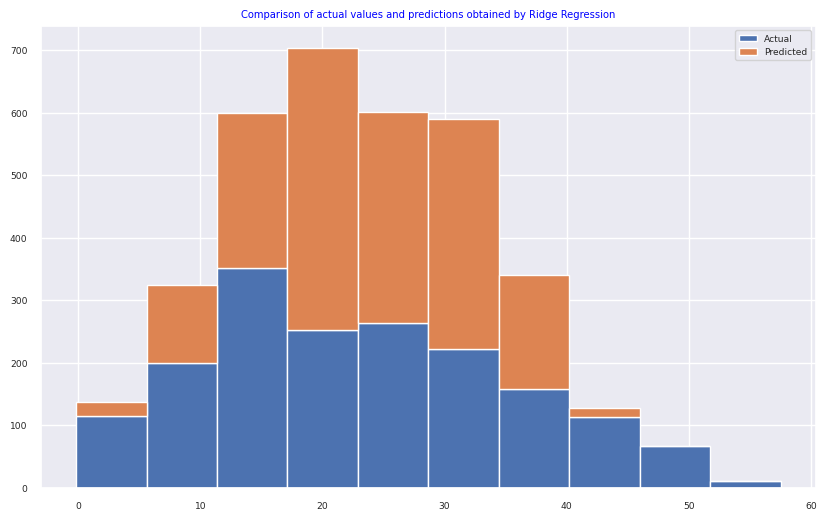

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression
plot_comparison(Y_test_pred_ridge,'Ridge Regression')

In [ ]:
#Calculating the evaluation metrics for Ridge Regression
evaluate_model(Y_test_pred_ridge,'Ridge Regression')

The evaluation metrics for Ridge Regression are given as:
Model: Ridge Regression
MSE: 86.41718715992857
RMSE: 9.29608450692702
R2: 0.451271566746525
Adjusted R2: 0.4481197664406463


**The results obtained from both Linear regression and Ridge regression show minimal differences.**


####**Lasso Regression:**
Lasso regression analysis is a technique used for linear regression models that combines shrinkage and variable selection. Its objective is to identify a subset of predictors that minimizes the prediction error for a quantitative response variable. Lasso regression employs the linear regression model with L1 regularization.

In [ ]:
#Creating a Lasso regression model using GridSearchCV
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,1,5,10,20,30,35,40,50,60,70,80,90,100]}
lasso_regressor=GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 35, 40, 50, 60, 70, 80, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Lasso regression fetched through GridSearchCV
best_alpha = lasso_regressor.best_params_['alpha']
best_score = lasso_regressor.best_score_

print("The best value for alpha in lasso regression through GridSearchCV is found to be:", best_alpha)
print(f"Using {best_alpha} as the value for alpha gives us a negative mean squared error of:", best_score)

The best value for alpha in lasso regression through GridSearchCV is found to be: 0.001
Using 0.001 as the value for alpha gives us a negative mean squared error of: -80.47577023519264


In [ ]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
lasso_model=Lasso(alpha=best_alpha).fit(X_train,y_train)
lasso_model

Lasso(alpha=0.001)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_lasso = lasso_model.predict(X_test)
Y_test_pred_lasso

array([17.15929252, 20.54013207, 16.9677359 , ..., 13.25552773,
       29.2259431 , 17.09503705])

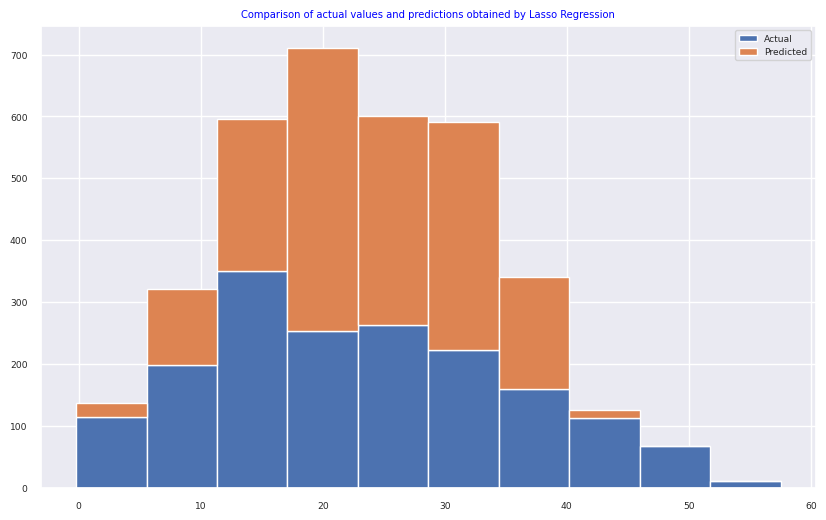

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Lasso Regression
plot_comparison(Y_test_pred_lasso,'Lasso Regression')

In [ ]:
#Calculating the evaluation metrics for Lasso Regression
evaluate_model(Y_test_pred_ridge,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
Model: Lasso Regression
MSE: 86.41718715992857
RMSE: 9.29608450692702
R2: 0.451271566746525
Adjusted R2: 0.4481197664406463


**The model quality has deteriorated when applying the lasso regression method.**


####**ElasticNet Regression**
ElasticNet regression is a regularization technique that combines the properties of both Ridge regression and Lasso regression. It is used to address situations where there are high correlations among independent variables and when the number of predictors is large.

In [ ]:
#Creating a ElasticNet regression model using GridSearchCV
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for ElasticNet regression fetched through GridSearchCV
best_alpha = elastic_regressor.best_params_['alpha']
best_score = elastic_regressor.best_score_
print("The best value for alpha in elastic regression through GridSearchCV is found to be:", best_alpha)
print(f"Using {best_alpha} as the value for alpha gives us a negative mean squared error of:", best_score)

The best value for alpha in elastic regression through GridSearchCV is found to be: 0.001
Using 0.001 as the value for alpha gives us a negative mean squared error of: -80.47459264632201


In [ ]:
#Fitting the ElasticNet regression model on the dataset with appropriate alpha value
elastic_model=ElasticNet(alpha=0.001).fit(X_train,y_train)
elastic_model

ElasticNet(alpha=0.001)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_elastic = elastic_model.predict(X_test)
Y_test_pred_elastic

array([17.16230549, 20.59353558, 17.02887477, ..., 13.26371768,
       29.2076228 , 17.0835115 ])

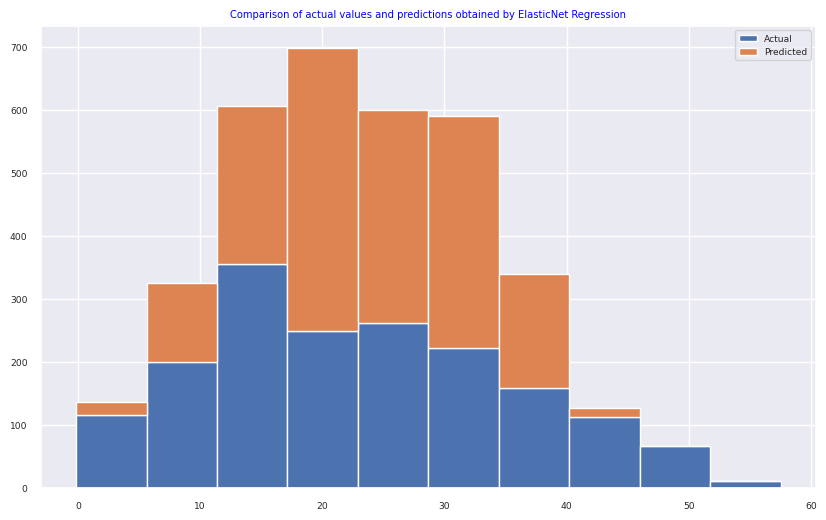

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression
plot_comparison(Y_test_pred_elastic,'ElasticNet Regression')

In [ ]:
#Calculating the evaluation metrics for Elastic Regression
evaluate_model(Y_test_pred_elastic,'ElasticNet Regression')

The evaluation metrics for ElasticNet Regression are given as:
Model: ElasticNet Regression
MSE: 86.41470673431694
RMSE: 9.29595109358461
R2: 0.4512873168548588
Adjusted R2: 0.4481356070148522


After applying ElasticNet regression, it was observed that the model did not show significant improvement.

##RANDOM FOREST:

A random forest is a machine learning algorithm that acts as a meta estimator. It constructs multiple decision trees by using different sub-samples of the dataset. By aggregating the predictions from these trees, it enhances predictive accuracy and helps prevent overfitting.

In [ ]:
# Create a Random Forest Regression model
rand_forest = RandomForestRegressor()

# Define the parameter grid for GridSearchCV
parameters = {
    'n_estimators': [10, 12, 15, 18, 20],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
rf_model_grid = GridSearchCV(estimator=rand_forest, param_grid=parameters, scoring='r2', cv=5)

# Fit the model to the training data
rf_model_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 12, 15, 18, 20]},
             scoring='r2')

In [ ]:
#Getting the best parameters for Random Forest regression fetched through GridSearchCV
print(f'The best value for parameters in random forest regression through GridSearchCV is found to be {rf_model_grid.best_params_}')
print(f'\nUsing {rf_model_grid.best_params_} as the value for the parameters in random forest model, it gives us a negative mean squared error of: {rf_model_grid.best_score_}')

The best value for parameters in random forest regression through GridSearchCV is found to be {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}

Using {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20} as the value for the parameters in random forest model, it gives us a negative mean squared error of: 0.7118415595038671


In [ ]:
#Fitting Random Forest model on the dataset with appropriate paramter values
rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=20).fit(X_train,y_train)
rf_model

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=20)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_rf = rf_model.predict(X_test)
Y_test_pred_rf

array([12.68030619, 21.36072262, 19.16766657, ..., 16.92473637,
       31.19456602, 25.31652417])

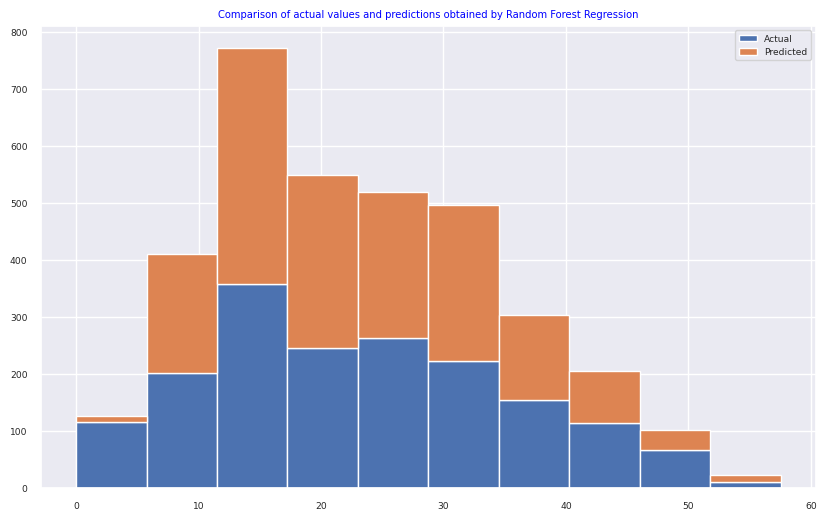

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Random Forest Regression
plot_comparison(Y_test_pred_rf,'Random Forest Regression')

In [ ]:
#Calculating the evaluation metrics for Random Forest Regression
evaluate_model(Y_test_pred_rf,'Random Forest Regression')

The evaluation metrics for Random Forest Regression are given as:
Model: Random Forest Regression
MSE: 54.269700439034644
RMSE: 7.36679716288121
R2: 0.6554004050150859
Adjusted R2: 0.6534210851128175


**As we can see The quality of the model's predictions has significantly improved.**


### MODEL EXPLAILABILITY:

Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:

LIME

SHAP

ELI-5

In [ ]:
#Installing the shap library
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Initialising javascript for visualisation of SHAP
import shap

In [ ]:
#Creating a function to plot the shap summary plot
def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X.columns)

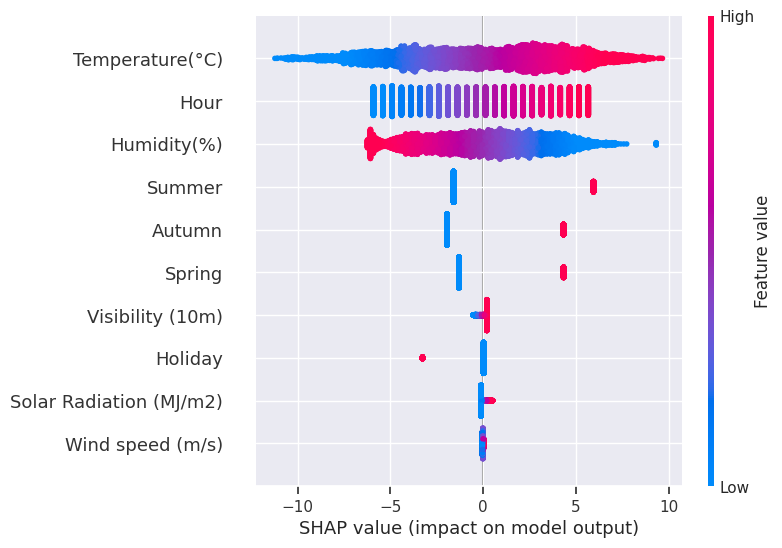

In [ ]:
#Plotting shap summary plot for linear regression
shap_summary(regressor)

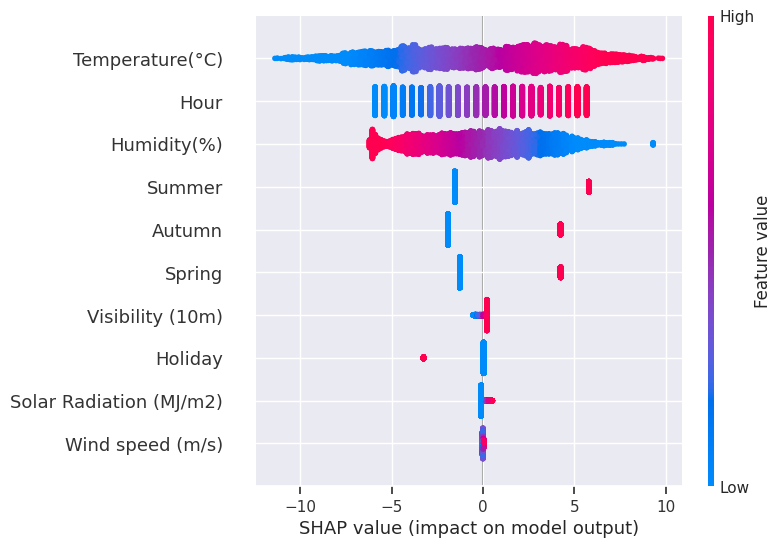

In [ ]:
#Plotting shap summary plot for Ridge regression
shap_summary(ridge_model)

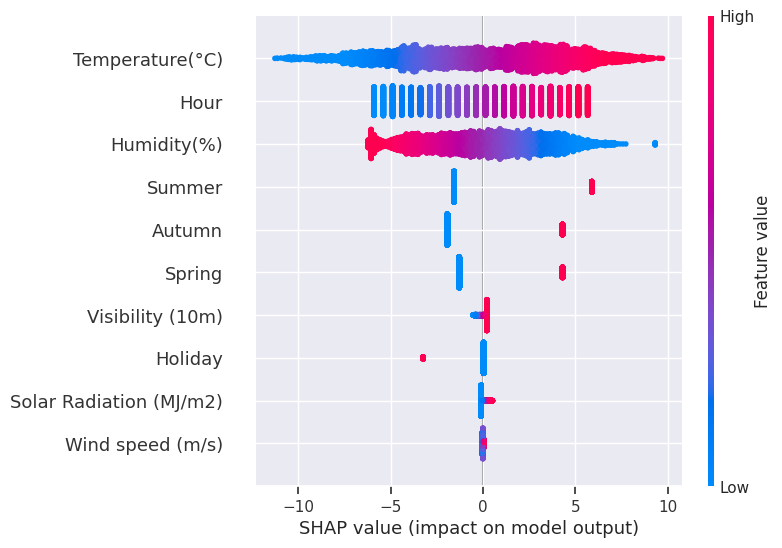

In [ ]:
#Plotting shap summary plot for Lasso regression
shap_summary(lasso_model)

 99%|===================| 6972/7008 [01:16<00:00]       

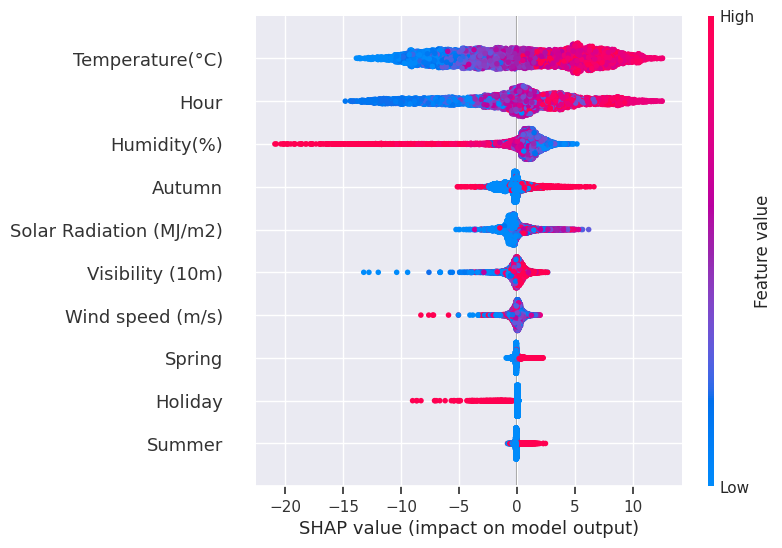

In [ ]:
#Plotting shap summary plot for Random forest regression model
explainer_shap = shap.Explainer(model=rf_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

we see that Each model assigns different levels of importance or impact to the features, which ultimately determines their performance in making predictions. Among the four models, Random Forest stands out as it assigns a significant impact power to almost all the features, leading to its superior performance.

By examining the SHAP summary plot for each model, we can gain insights into the importance of each feature and assess its impact power by analyzing the corresponding SHAP values.






# **Conclusion**

**EDA INSIGHTS**

     1.The Summer season sees the highest number of bike rentals, while the
     2.winter season experiences the lowest demand.
     3.Non-holiday days account for over 96% of bike rentals.
     4.Bike rentals peak in the temperature range of 15 to 30 degrees Celsius.
     5.Bike rentals are highest when there is no snowfall or rainfall.
     6.The majority of bike rentals occur when the humidity level ranges from
       30% to 70%.
     7.The 18th hour, or 6pm, records the highest number of bike rentals, while
      the 4th hour, or 4am, has the lowest demand.
     8.Bike rentals are most frequent during periods of high visibility.

**ML RESULT**

     1. Among the models evaluated, Random Forest Regression performs the best
      with an r2 score of 0.65105.
     2.Lasso Regression (with L1 regularization) and ElasticNet Regression is
     the least performing model, achieving an r2 score of 0.4513.
     3.Visualizations comparing actual values and predictions have been created
     for all four models.
     4.The SHAP library has been utilized to provide explanations for each of
        the four models.
     5.According to all the models, temperature and hour are identified as the
      two most influential factors in predicting bike rentals.





**CHALLENGE FACED**
  
Removing Outliers.

Encoding the categorical columns.

Removing Multicollinearity from the dataset.

Choosing Model explainability technique.
   


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***